# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

clients’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of clients and identify the clients who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that clients do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 'Attrited Customer' else 'Existing Customer'
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like '# write your code here' or '# complete the code'. Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

##### Installing the libraries with the specified version.
##### uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
!pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [2]:
# libaries for data manipulation & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x) # To suppress scientific notations

# libaries for model building & processing
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    roc_curve, 
    classification_report,
)
from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold, 
    KFold, 
    cross_val_score,
)

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.compose import ColumnTransformer
from sklearn import set_config 
set_config(transform_output='pandas', display='diagram')

from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)


from xgboost import XGBClassifier, plot_importance

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
creditData = pd.read_csv('BankChurners.csv')
df = creditData.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
pd.concat([df.head(), df.tail()])

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [5]:
df.shape

(10127, 21)

---
- There are 10127 rows, and 21 columns. 
---

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.dtypes.value_counts()

int64      10
object      6
float64     5
dtype: int64

---
- There are 6 categorical features with type object; the 15 others are numerical.
- Education_Level and Marital_Status show missing data.
---

In [8]:
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [9]:
round(df.isnull().sum() / df.isnull().count()*100,2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

In [10]:
df.duplicated().sum()

0

---
- No duplicates in the data set
- There aree 1519 missing values in Education_Level and 749 missing values in Marital_Status. 
---

In [11]:
df.describe(include=['number']).T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [12]:
df.describe(include=['object']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


---
- The average Customer Age is 46. The average Number of Dependents is 2, etc.
- The average for Total Transaction Amount is \\$4404 and for Total Transaction Count is 65.
- Note, the rate of change: 'Ratio Q4 over Q1' = (Q4 - Q1) / Q1
- The average ratio change in Transaction Amount (Q4 over Q1) is 0.76.
- So on average, most clients spend 76% more in the 4th quarter than in the 1st quarter
- The average ratio change in Transaction Count (Q4 over Q1) is 0.71
- Similarly, the rate of change in the Transaction Count is 71% which correlates with the growth rate of Transaction Amount. 
- The average Card Utilization Ratio is good at 0.28 compared to the national ratio, recommended under 30% for a good credit score.
- The majority of the data set are existing clients who are female, married, and graduates in education.
- The majority have the Blue card and income less than \\$40k. 
---

In [13]:
# Display the unique values in each category feature
print(df.select_dtypes(include=['object']).apply(lambda col: col.unique()))

Attrition_Flag                                          [Existing Customer, Attrited Customer]
Gender                                                                                  [M, F]
Education_Level    [High School, Graduate, Uneducated, nan, College, Post-Graduate, Doctorate]
Marital_Status                                                [Married, Single, nan, Divorced]
Income_Category         [$60K - $80K, Less than $40K, $80K - $120K, $40K - $60K, $120K +, abc]
Card_Category                                                   [Blue, Gold, Silver, Platinum]
dtype: object


In [14]:
# Encoding with 0 and 1 for analysis.
df['Attrition_Flag'].replace('Existing Customer', 0, inplace=True)
df['Attrition_Flag'].replace('Attrited Customer', 1, inplace=True)

# Data imputation
df['Income_Category'].replace('abc', np.nan, inplace=True)

# Dropping column CLIENTNUM
df.drop(['CLIENTNUM'], axis=1, inplace=True)

---
- Attrition_Flag is the target variable containing 2 unique values Existing Customer and Attrited Customer, encoded with 0 and 1.
- Income_Category feature has values 'abc' which is replaced with nan.
- CLIENTNUM column is dropped because it has a unique number for each client that does not add any value for modeling.
---

In [15]:
# Identity numerical and categorical columns for EDA
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Convert object datatypes to category.
df[cat_cols] = df[cat_cols].astype('category') 

In [16]:
df.dtypes

Attrition_Flag                 int64
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

---
##### Observations
- The 5 categorical features that will need One hot encoding later are:
      Gender, Education_Level, Marital_Status, Income_Category, and Card_Category.
- Attrition_Flag has been encoded and now type integer.
- The 3 features with nan values that will be processed with SimpleImputer later:
      Education_Level, Marital_Status, and Income_Category
---

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of clients?
3. What is the distribution of the level of income of clients?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [17]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    '''
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2,  showmeans = True, meanline=True,  color='violet'
    )  # boxplot will be created and a dashed line will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter'
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color='green', linestyle='--'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    '''
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    '''

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
# Function to plot Stacked Barplot
def stacked_barplot(data, predictor, target):
    '''
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    '''
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True, rownames=None).sort_values(
        by=sorter, ascending=False
    )
    tab1['% of 0'] = round(tab1[0]/tab1['All']*100, 2)
    tab1['% of 1'] = round(tab1[1]/tab1['All']*100, 2)
    print(tab1)
    print('-' * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind='bar', stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc='lower left', frameon=False,
    )
    plt.legend(title=target, loc='upper left', bbox_to_anchor=(1, 1), labels=['0: Existing Customer', '1: Attrited Customer'])
    plt.show()

In [20]:
### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(9, 6))

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of target for target=' + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
    )

    axs[0, 1].set_title('Distribution of target for target=' + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
    )

    axs[1, 0].set_title('Boxplot w.r.t target')
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette='gist_rainbow')

    axs[1, 1].set_title('Boxplot (without outliers) w.r.t target')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='gist_rainbow',
    )

    plt.tight_layout()
    plt.show()

In [21]:
# Function to plot countplot with percentage.
def count_plot(data, feature):
    total_rows = data[feature].count()
    count = df[feature].nunique()
    ax = sns.countplot(data=data, x=feature, palette = 'colorblind', legend=True, hue=feature)
    for i in range (0, count):
        plt.bar_label(ax.containers[i],  fmt=lambda x: f'{(x/total_rows)*100:0.1f}%');
        
#function to find outliers using IQR
def find_outliers(data, feature):
   q1=data[feature].quantile(0.25)
   q3=data[feature].quantile(0.75)
   IQR=q3-q1
   return data[((data[feature]<(q1-1.5*IQR)) | (data[feature]>(q3+1.5*IQR)))]

#function to summarize outliers in percentage using IQR
def sum_outliers(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower = (q1-1.5*IQR)
    upper = (q3+1.5*IQR)
    return ((data.select_dtypes(include=['float64', 'int64']) < lower) | (data.select_dtypes(include=['float64', 'int64']) > upper)).sum() / len(data) * 100

#### Univariate Analysis

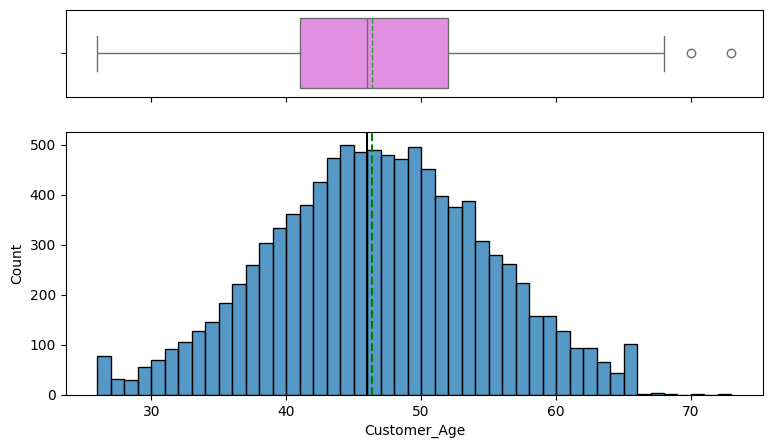

In [22]:
histogram_boxplot(df, 'Customer_Age')

In [23]:
find_outliers(df, 'Customer_Age').sort_values(by='Customer_Age', ascending=False)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
251,0,73,M,0,High School,Married,$40K - $60K,Blue,36,5,3,2,4469.000,1125,3344.000,1.363,1765,34,1.615,0.252
254,0,70,M,0,High School,Married,Less than $40K,Blue,56,3,2,3,3252.000,1495,1757.000,0.581,1227,15,0.875,0.460


---
##### Observations (Customer_Age Feature):
- The data set is symmetrical distributed.
- There are 2 elderly people at 70 and 73.
- The mean and median for age are both at 46.
---

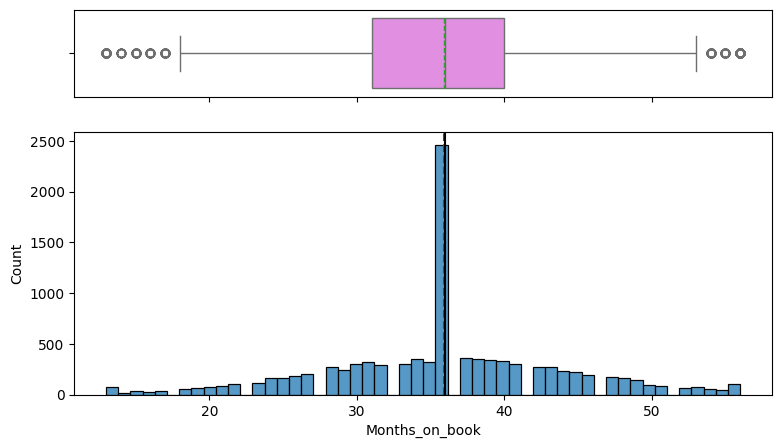

In [24]:
histogram_boxplot(df, 'Months_on_book')

In [25]:
find_outliers(df, 'Months_on_book').sort_values(by='Months_on_book', ascending=False)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1830,1,65,F,0,Graduate,Divorced,Less than $40K,Blue,56,3,6,3,6184.000,0,6184.000,1.016,1712,27,0.286,0.000
2214,0,63,M,0,Graduate,Married,$40K - $60K,Blue,56,4,2,5,6500.000,1786,4714.000,0.524,1497,27,0.350,0.275
5362,0,62,M,0,Graduate,NaN,$80K - $120K,Blue,56,5,3,2,29100.000,1228,27872.000,0.722,5041,74,0.805,0.042
5327,0,65,M,1,NaN,Single,$40K - $60K,Blue,56,6,2,4,13364.000,1318,12046.000,1.063,4548,54,0.862,0.099
2104,0,63,F,0,Uneducated,Single,$40K - $60K,Blue,56,3,6,4,1438.300,0,1438.300,0.864,3630,71,0.578,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,0,26,F,0,High School,Single,Less than $40K,Blue,13,6,3,4,3517.000,1195,2322.000,0.556,2255,48,0.500,0.340
1488,0,26,F,0,Graduate,Single,$40K - $60K,Blue,13,5,1,2,5655.000,0,5655.000,0.842,2312,61,0.649,0.000
7570,0,43,F,3,High School,NaN,Less than $40K,Blue,13,6,2,1,2605.000,2269,336.000,0.881,5298,79,0.837,0.871
1503,0,26,F,0,NaN,Single,NaN,Blue,13,4,2,2,2600.000,1876,724.000,0.606,2625,45,0.364,0.722


---
##### Observations (Months_on_book Feature):
- The data set is symmetrically distributed.
- There are 386 outliers for both upper and lower whiskers.
- The min for Months_on_book is 13, and the max for Months_on_book is 56.
- The average number of months that most clients have credit card accounts is 36 months with close to 2500 in counts whereas other groups are well below 500 in counts.
- This data shows that most clients have very decent relationships with the Bank in terms of duration.
---

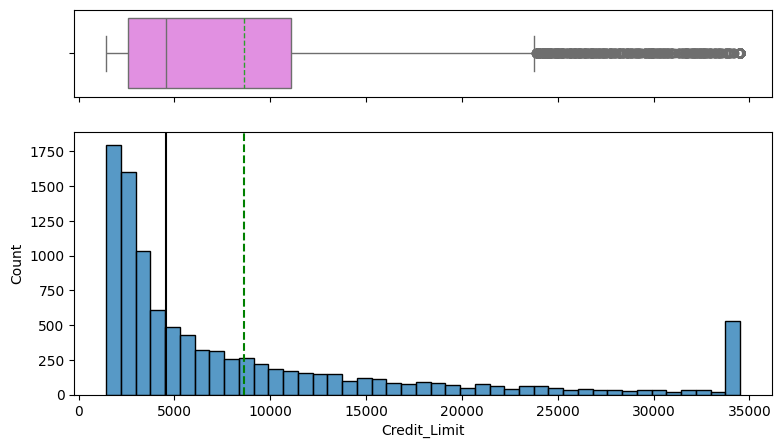

In [26]:
histogram_boxplot(df, 'Credit_Limit')

In [27]:
find_outliers(df, 'Credit_Limit').sort_values(by='Credit_Limit', ascending=False)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,0,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7983,0,40,M,5,High School,Single,$120K +,Blue,31,1,1,3,34516.000,1427,33089.000,0.706,3699,64,0.488,0.041
7207,1,54,M,4,High School,Single,$80K - $120K,Silver,49,1,3,4,34516.000,214,34302.000,0.000,1201,22,0.000,0.006
7232,1,49,M,2,Graduate,NaN,$80K - $120K,Blue,38,3,4,3,34516.000,0,34516.000,0.482,1592,35,0.346,0.000
7263,0,53,M,3,College,Single,$120K +,Silver,44,4,4,2,34516.000,1073,33443.000,0.558,4485,86,0.755,0.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,0,51,M,0,Uneducated,Divorced,$120K +,Blue,41,4,1,0,23898.000,0,23898.000,0.486,3781,66,0.610,0.000
9524,0,52,M,3,Graduate,Married,$60K - $80K,Blue,44,1,2,1,23889.000,603,23286.000,0.792,13360,124,0.968,0.025
2671,1,49,M,3,Post-Graduate,Married,$80K - $120K,Blue,45,3,0,4,23870.000,0,23870.000,0.604,1885,39,0.345,0.000
3577,0,52,F,3,High School,Married,NaN,Blue,42,3,2,1,23858.000,1179,22679.000,0.671,3784,69,0.683,0.049


---
##### Observations (Credit_Limit Feature):
- The data distribution is right skewed.
- There are 984 continuous outliers in the upper whisker which range from \\$23,848 to \\$34,516.
- The average Credit Limit is \\$8632, the median is \\$4549, and the min is \\$1438.
- This data shows that these clients have decent Credit Limits and typically have decent credit scores.
- Many clients start out from \\$1438 on Credit_Limit, and some have over \\$23k on Credit_Limit.
---

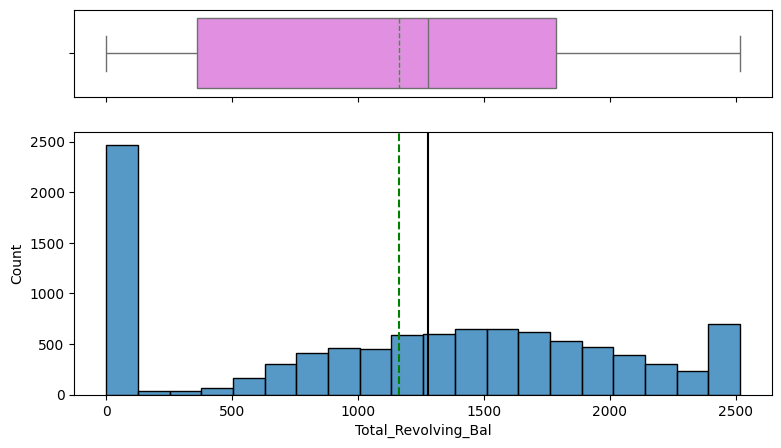

In [28]:
histogram_boxplot(df, 'Total_Revolving_Bal')

---
##### Observations (Total_Revolving_Bal Feature):
- The data set is normally distributed but not symmetrical.
- Many clients have zero balance, and some have a max balance of \\$2500.
- The average Revolving Balance is \\$1163 which is closed to the median at \\$1276.
- This data shows that the average revolving balance of these clients is not high in proportioned to average Credit Limit given.
---

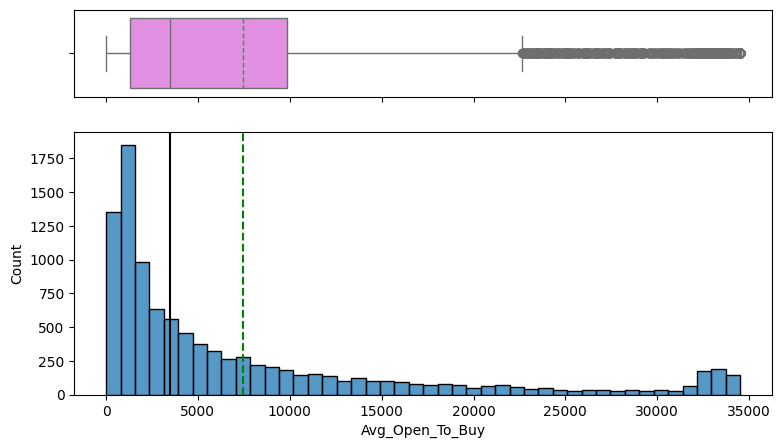

In [29]:
histogram_boxplot(df, 'Avg_Open_To_Buy')

In [30]:
find_outliers(df, 'Avg_Open_To_Buy').sort_values(by='Avg_Open_To_Buy', ascending=False)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10112,1,33,M,2,College,Married,$120K +,Gold,20,2,1,4,34516.000,0,34516.000,1.004,9338,73,0.622,0.000
9047,1,50,M,1,Post-Graduate,NaN,$80K - $120K,Gold,36,2,3,2,34516.000,0,34516.000,1.032,5547,75,0.744,0.000
2196,0,50,M,3,High School,Married,$120K +,Blue,40,5,1,4,34516.000,0,34516.000,0.986,1930,36,0.440,0.000
2201,1,55,F,2,College,Single,NaN,Silver,36,2,3,3,34516.000,0,34516.000,0.399,1353,40,0.212,0.000
9127,0,56,F,3,Uneducated,Single,NaN,Platinum,46,2,3,2,34516.000,0,34516.000,0.887,8416,93,0.632,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0,42,F,2,Uneducated,Married,NaN,Blue,31,4,2,0,22718.000,0,22718.000,0.791,1191,37,1.176,0.000
651,0,35,M,3,Graduate,Single,$80K - $120K,Blue,24,4,1,2,23561.000,864,22697.000,1.373,2447,64,1.000,0.037
1438,0,51,M,1,Uneducated,Married,$80K - $120K,Blue,42,6,2,2,25197.000,2517,22680.000,0.721,3002,58,0.812,0.100
3577,0,52,F,3,High School,Married,NaN,Blue,42,3,2,1,23858.000,1179,22679.000,0.671,3784,69,0.683,0.049


---
##### Observations (Avg_Open_To_Buy Feature):
- The data distribution is right skewed.
- There are 963 outliers or clients with high available credit for purchase which range from \\$22664 to \\$34516.
- The average available credit is \\$7469, and the median is \\$3474.
- This data shows that even though the majority of clients have alot of available credit, the most frequent available credit is $1438 and lower.
---

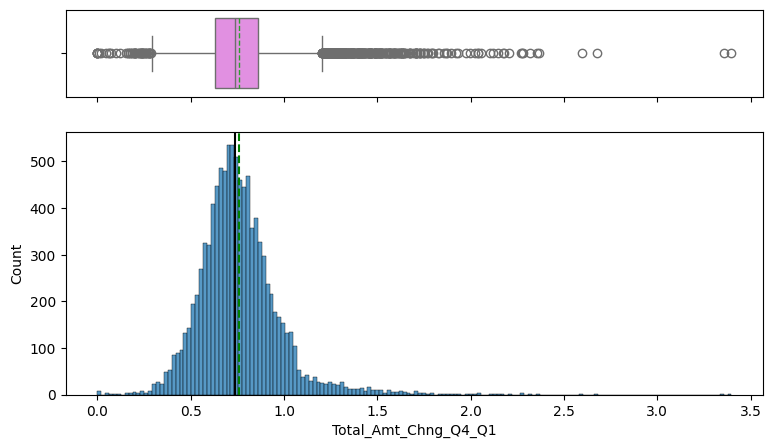

In [31]:
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1')

In [32]:
find_outliers(df, 'Total_Amt_Chng_Q4_Q1').sort_values(by='Total_Amt_Chng_Q4_Q1', ascending=False)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
12,0,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.000,0,11751.000,3.397,1539,17,3.250,0.000
8,0,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
773,0,61,M,0,Post-Graduate,Married,NaN,Blue,53,6,2,3,14434.000,1927,12507.000,2.675,1731,32,3.571,0.134
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
219,0,44,F,3,Uneducated,Divorced,Less than $40K,Silver,38,4,1,3,11127.000,1835,9292.000,2.368,1546,25,1.273,0.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7998,1,37,F,3,Post-Graduate,Married,$40K - $60K,Blue,36,2,2,5,3233.000,2517,716.000,0.000,1339,32,0.000,0.779
3596,1,45,M,1,Graduate,Single,$60K - $80K,Blue,41,2,3,2,9904.000,2513,7391.000,0.000,1152,28,0.000,0.254
7207,1,54,M,4,High School,Single,$80K - $120K,Silver,49,1,3,4,34516.000,214,34302.000,0.000,1201,22,0.000,0.006
4417,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,6,3,3,8258.000,1771,6487.000,0.000,1447,23,0.000,0.214


---
##### Observations (Total_Amt_Chng_Q4_Q1 Feature):
- The data set is symmetrically distributed.
- There are 396 outliers total in both upper and lower whiskers.
- The average ratio change in Transaction Amount is 0.76, and the median is about the same at 0.74.
- This data shows that on average most clients spend 76% more in 4th quarter than 1st quarter.
---

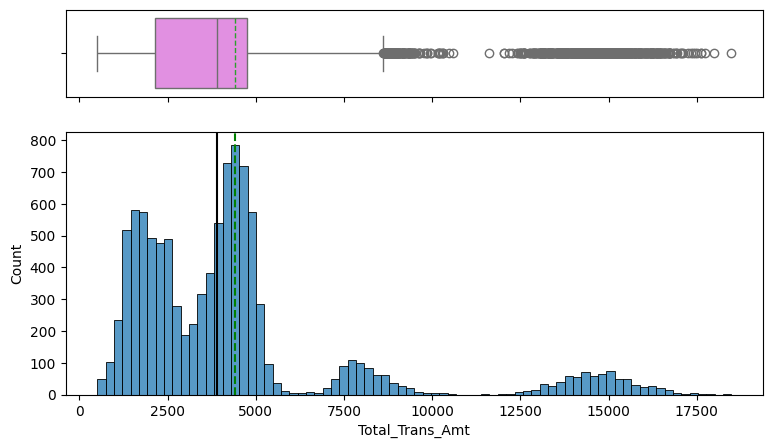

In [33]:
histogram_boxplot(df, 'Total_Trans_Amt')

In [34]:
find_outliers(df, 'Total_Trans_Amt').sort_values(by='Total_Trans_Amt', ascending=False)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9964,0,47,M,4,NaN,Married,$60K - $80K,Blue,36,4,5,2,10585.000,1749,8836.000,0.655,18484,108,0.588,0.165
10073,0,51,M,2,Graduate,Married,$60K - $80K,Blue,40,3,3,3,3750.000,1801,1949.000,0.889,17995,116,0.657,0.480
10097,0,31,M,0,High School,Single,$40K - $60K,Blue,25,3,2,3,4493.000,1388,3105.000,0.795,17744,104,0.763,0.309
9601,0,45,M,4,High School,Single,$60K - $80K,Blue,35,1,1,3,8449.000,2092,6357.000,0.709,17634,120,0.667,0.248
9341,0,48,M,2,High School,Married,Less than $40K,Silver,36,2,2,2,14581.000,2517,12064.000,0.776,17628,109,0.817,0.173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9028,0,45,F,4,Graduate,Married,Less than $40K,Silver,40,2,5,2,10677.000,0,10677.000,0.905,8637,94,0.808,0.000
9921,1,49,M,2,NaN,Married,$80K - $120K,Blue,39,2,3,4,29865.000,2097,27768.000,0.902,8636,74,0.947,0.070
9093,0,63,M,1,High School,Single,$60K - $80K,Blue,54,2,3,3,23355.000,1061,22294.000,0.864,8634,95,0.900,0.045
9231,1,51,M,4,Graduate,Single,$80K - $120K,Silver,42,6,4,2,34516.000,230,34286.000,1.004,8629,65,0.548,0.007


---
##### Observations (Total_Trans_Amt Feature):
- The data set is right skewed but not symmetrical distributed.
- There are 896 outliers range from \\$8620 to \\$18484.
- The average Total Transaction Amount is \\$4404, and the median is \\$3899
- This data shows that about 9% of people spend a lot out money on credit card, but the majority has an average spending about $4000
---

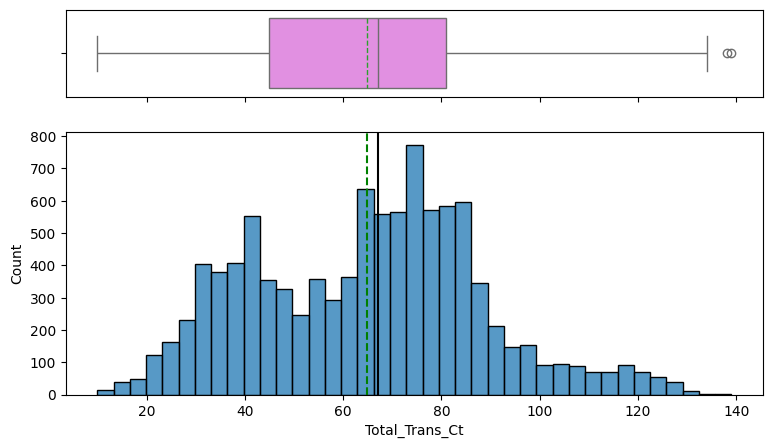

In [35]:
histogram_boxplot(df, 'Total_Trans_Ct')

---
##### Observations (Total_Trans_Ct Feature):
- The data set is normally distributed.
- The average Total Transaction Count is 65, which is close to the median at 67.
- This data shows that Total Transaction Count per year for these clients are much lower than the national average or they use their credit cards almost weekly and not daily.
---

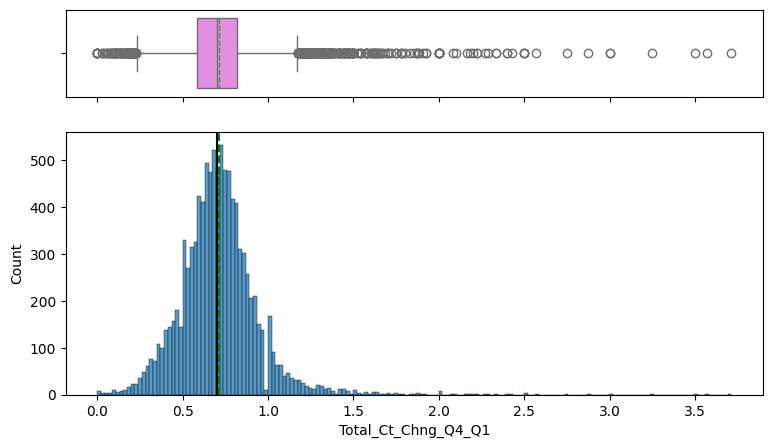

In [36]:
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1')

In [37]:
find_outliers(df, 'Total_Ct_Chng_Q4_Q1').sort_values(by='Total_Ct_Chng_Q4_Q1', ascending=False)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
773,0,61,M,0,Post-Graduate,Married,NaN,Blue,53,6,2,3,14434.000,1927,12507.000,2.675,1731,32,3.571,0.134
269,0,54,M,5,Graduate,Married,$60K - $80K,Blue,38,3,3,3,2290.000,1434,856.000,0.923,1119,18,3.500,0.626
12,0,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.000,0,11751.000,3.397,1539,17,3.250,0.000
113,0,54,F,0,Uneducated,Married,Less than $40K,Blue,36,2,2,2,1494.000,706,788.000,1.674,1305,24,3.000,0.473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7998,1,37,F,3,Post-Graduate,Married,$40K - $60K,Blue,36,2,2,5,3233.000,2517,716.000,0.000,1339,32,0.000,0.779
4701,1,52,M,3,Uneducated,Single,$120K +,Blue,48,5,3,4,20974.000,0,20974.000,0.000,1246,27,0.000,0.000
7165,1,47,F,3,Graduate,Married,NaN,Blue,36,3,3,1,5590.000,0,5590.000,0.010,1507,32,0.000,0.000
7207,1,54,M,4,High School,Single,$80K - $120K,Silver,49,1,3,4,34516.000,214,34302.000,0.000,1201,22,0.000,0.006


---
##### Observations (Total_Ct_Chng_Q4_Q1 Feature):
- The data set is symmetrically distributed.
- There are 394 outliers in both upper and lower whiskers.
- The average ratio change in Transaction Count is 0.71 which is the same at the median at 0.70.
- This data shows that most clients have more transactions in 4th quarter than 1st quarter, similar to Total_Amt_Chng_Q4_Q1.
---

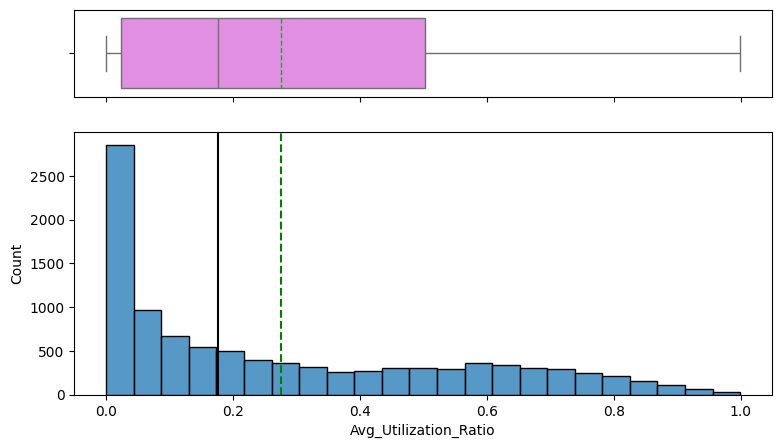

In [38]:
histogram_boxplot(df, 'Avg_Utilization_Ratio')

In [39]:
df[df.Avg_Utilization_Ratio ==0]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
12,0,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.000,0,11751.000,3.397,1539,17,3.250,0.000
21,1,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.300,0,1438.300,1.047,692,16,0.600,0.000
24,0,54,M,2,NaN,Married,$80K - $120K,Blue,42,4,2,3,12217.000,0,12217.000,1.075,1110,21,0.750,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109,0,47,M,5,High School,Single,Less than $40K,Blue,35,4,3,5,4165.000,0,4165.000,0.813,17093,111,0.820,0.000
10112,1,33,M,2,College,Married,$120K +,Gold,20,2,1,4,34516.000,0,34516.000,1.004,9338,73,0.622,0.000
10114,0,29,M,0,Graduate,Married,Less than $40K,Blue,15,3,1,5,4700.000,0,4700.000,0.617,14723,96,0.655,0.000
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000


---
##### Observations (Avg_Utilization_Ratio Feature):
- The data distribution is right skewed, and there is no outlier.
- The mean for Average Card Utilization Ratio is 0.27, and the median is 0.17
- This data shows that the majority of clients have full credit limit available for purchase.
- However, on average, many clients use 27% of credit line which is a good ratio (under 30%) for a good credit score .
---

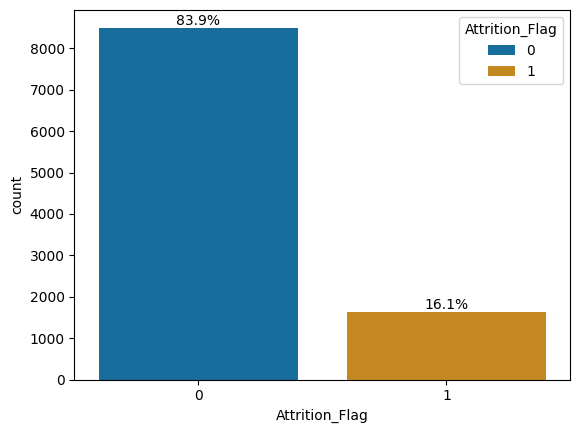

In [40]:
count_plot(df, 'Attrition_Flag')

---
##### Observations (Attrition_Flag Feature):
- About 84% of data set are existing clients and about 16% are attrited clients.
- This data shows that the distribution of the class weight is imbalanced.
---

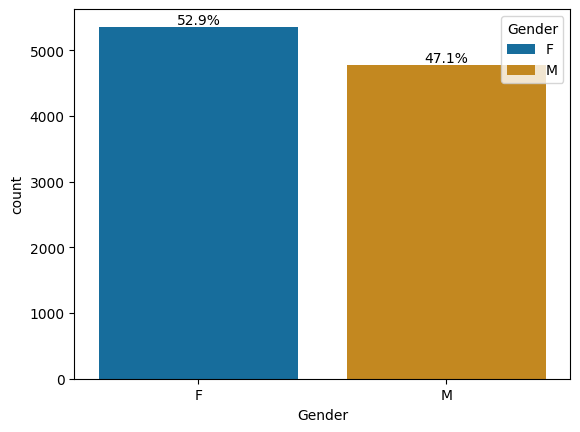

In [41]:
count_plot(df, 'Gender')

---
##### Observations (Gender Feature):
- About 47% of clients are male and 53% are female.
- This data shows that the gender distribution is almost the same 50/50 for both male and female.
---

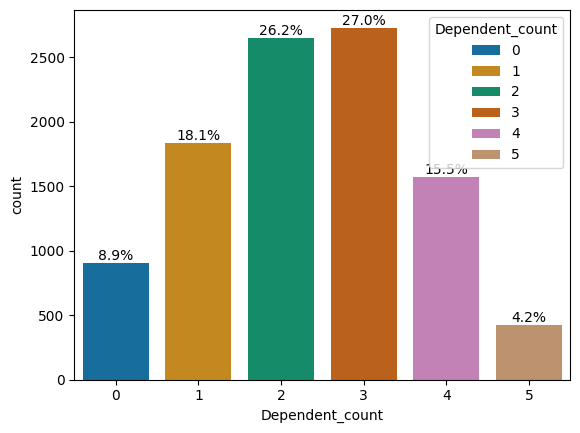

In [42]:
count_plot(df, 'Dependent_count')

---
##### Observations (Dependent_count Feature):
- The most frequent dependent count is 3 at 27%, followed by 2 at 26%, and 1 at 18%.
- This data shows that most clients have 1 or more kids whether they're married or not.
---

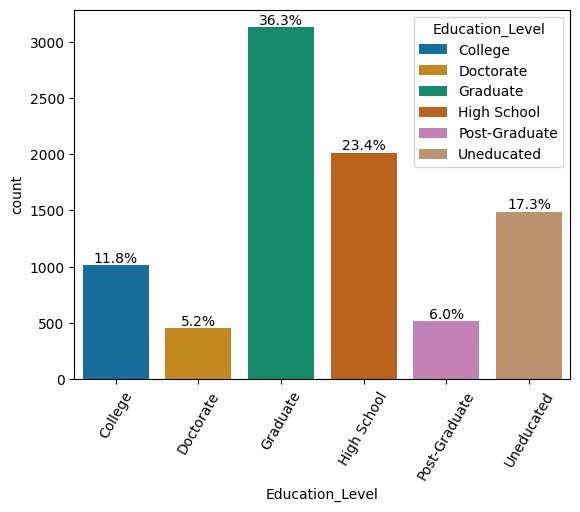

In [43]:
count_plot(df, 'Education_Level')
plt.xticks(rotation=60);

---
##### Observations (Education_Level Feature):
- The distribution of Educational Level is Graduate with the most frequent at 36%, followed by High School at 23%, and Uneducated at 17%.
- This data shows that the clients with Graduate and High School education level are the majority, about 60% of this population.
---

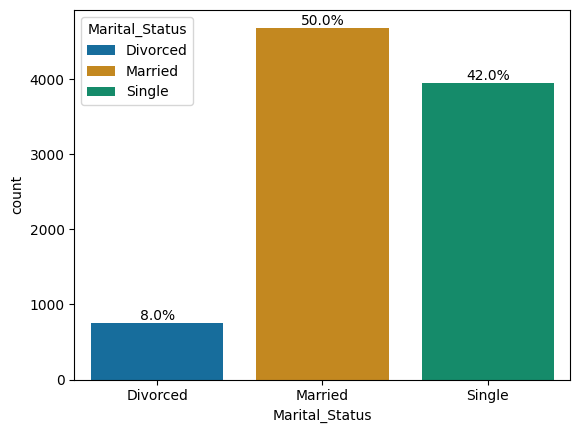

In [44]:
count_plot(df, 'Marital_Status')

---
##### Observations (Marital_Status Feature):
- About 50% of clients are married, 42% are single, and 8% are divorced.
- This data shows that the combined buckets of Single and Divorced are half of this population, and the other half is the Married bucket.
---

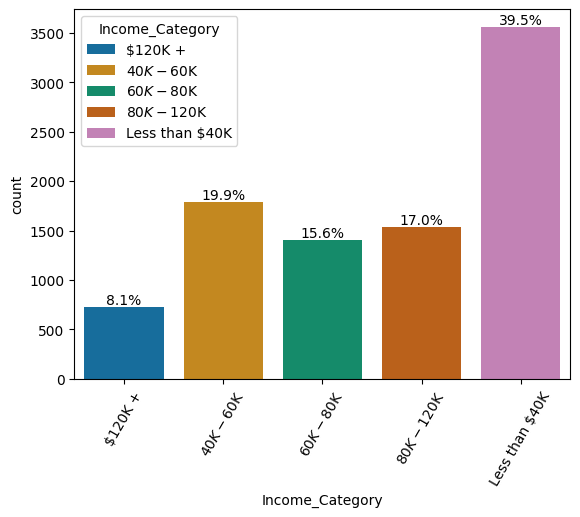

In [45]:
count_plot(df, 'Income_Category');
plt.xticks(rotation=60);

---
##### Observations (Income_Category Feature):
- The most frequent income level is Less than $40k at about 40%, followed by 40k-60k at 20%, and 80k-120k at 17%.
- The distribution of the level of income of clients is peaked with the low income less than 40K at 40%. 
---

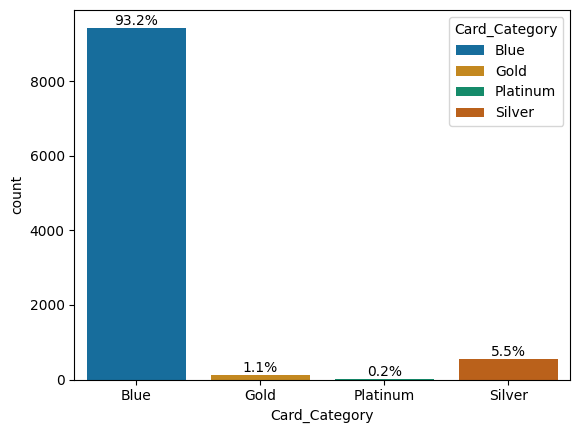

In [46]:
count_plot(df, 'Card_Category')

---
##### Observations (Card_Category Feature):
- Most clients or 93% of this population have Blue card.
- This data shows that clients with Gold, Silver, and Platinum cards are in the 10% outlier detection earlier in Credit Limit feature. 
---

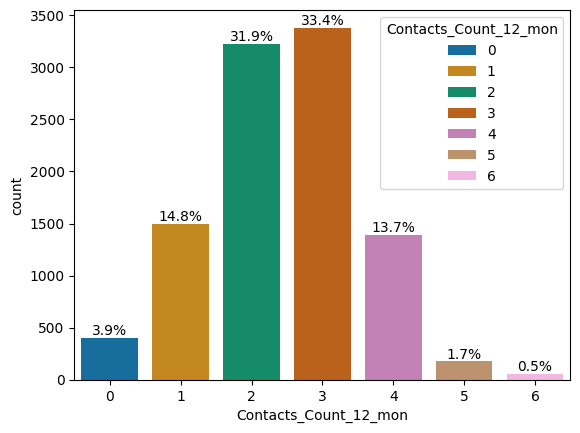

In [47]:
count_plot(df, 'Contacts_Count_12_mon')

---
##### Observations (Contacts_Count_12_mon Feature):
- The most frequent No. of Contacts in the last 12 months is 3, followed by 2.
- The median and mean are 2 and 2.5 respectively.
- This data shows that maybe 2 or 3 calls per year are normal to a regular client. And 5 or 6 calls per year are rare but might indicate some corellation with attrition. 
---

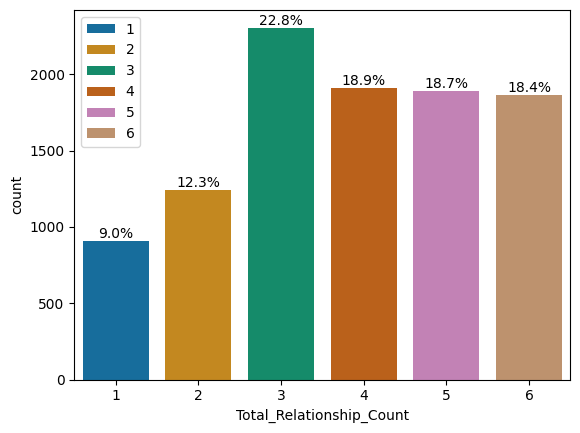

In [48]:
count_plot(df, 'Total_Relationship_Count')
plt.legend();

---
##### Observations (Total_Relationship_Count Feature):
- The most frequent Total no. of products held by the customer is 3 at 23%, followed by 4, 5, and 6 at around 18% each.
- The mean and median of Total_Relationship_Count are around 4.
- This data shows that these clients have several products with the Bank, not just a credit card.
---

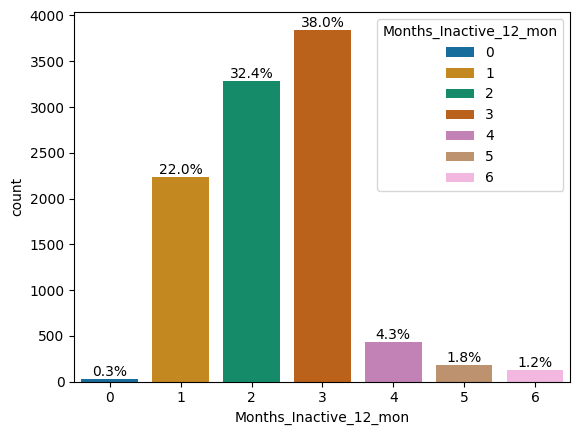

In [49]:
count_plot(df, 'Months_Inactive_12_mon')

---
##### Observations (Months_Inactive_12_mon Feature):
- The most frequent No. of months inactive in the last 12 months is 3, about 38% of this population.
- The mean and median for Months_Inactive_12_mon are close to 2.
- This data shows that most clients normally have their cards inactive from 1 to 3 months in a year.
- Very few people (about 0.3%) don't have a gap in activity, and fewer people (about 3%) have their cards inactive for 5 to 6 months.
---

#### Bivariate Analysis

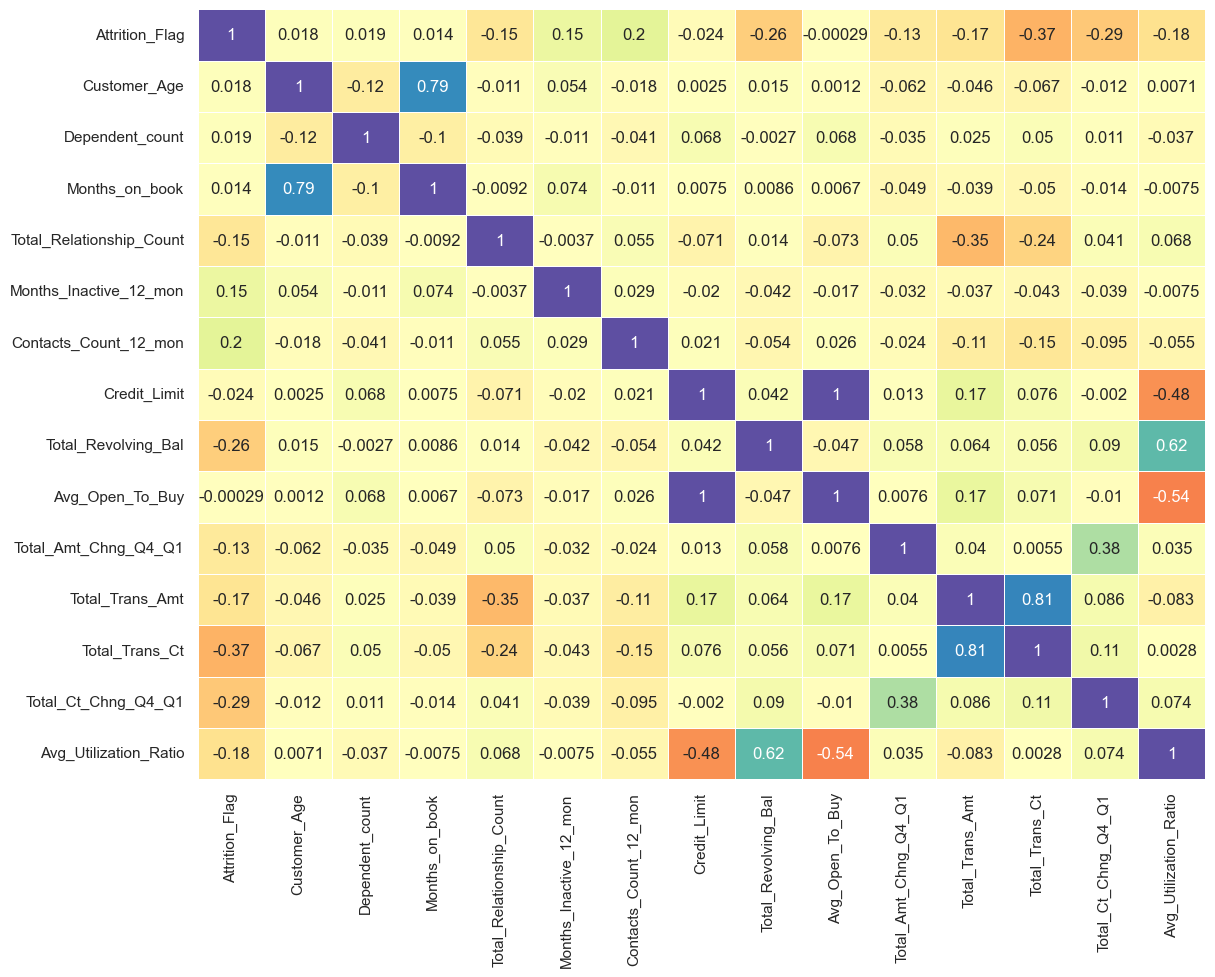

In [50]:
sns.set(rc={'figure.figsize':(13,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap='Spectral')
plt.show()

---
##### Observations (Heatmap):
- Avg_Open_To_Buy and Credit_Limit have linear correlation at 1.
- Months_on_book and Customer_Age are positively correlated at 0.79.
- Total_Trans_Ct and Total_Trans_Amt are positively correlated at 0.81.
- Avg_Utilization_Ratio and Total_Revolving_Bal are positively correlated at 0.62.
---

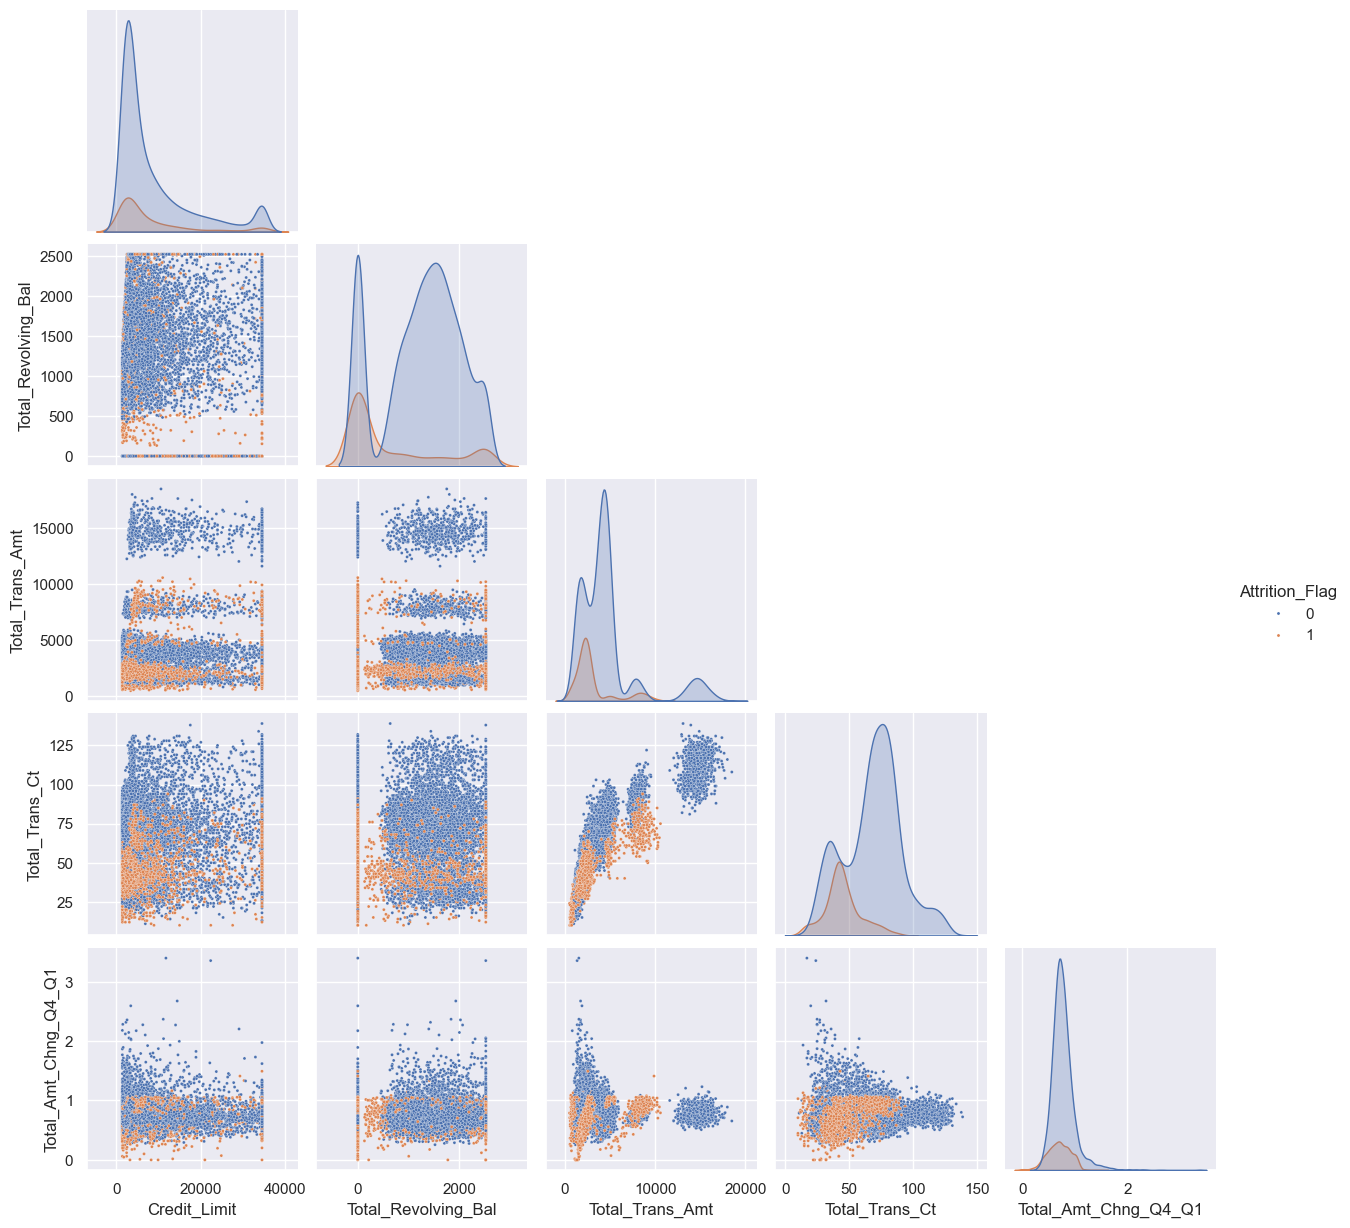

In [51]:
some_cols = ['Credit_Limit','Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1']
sns.pairplot(df, vars=some_cols, hue='Attrition_Flag', diag_kind='kde', corner=True, plot_kws={'s':5}); 

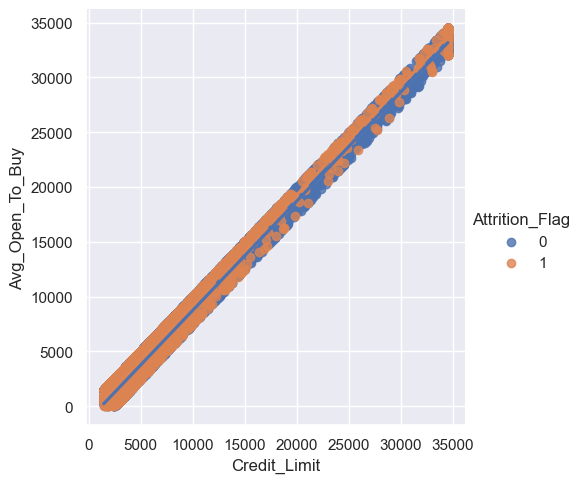

In [52]:
sns.lmplot(data=df, x='Credit_Limit', y='Avg_Open_To_Buy', hue='Attrition_Flag',ci=False);

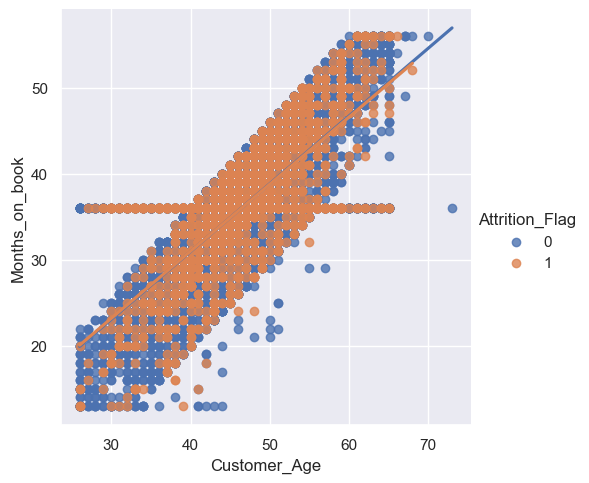

In [53]:
sns.lmplot(data=df, x='Customer_Age', y='Months_on_book', hue='Attrition_Flag',ci=False);

---
##### Observations (Pairplot):
- Avg_Open_To_Buy has a linear correlation with Credit Limit and will be considered dropping. They're part of the equation for Avg_Utilization_Ratio.
- Total_Trans_Ct has a positive correlation with Total_Trans_Amt. We can directly link these 2 features to attrition because the plot shows that the attrited customers have lower Total_Trans_Ct and Total_Trans_Amt. 
- Customer_Age has positive correlation with Months_on_book but not completely linear.
- The KDE diagonal plots reveal the hypothesis that the churners may have lower Credit Limits, Total Revolving Balance, Total Transaction Amount, Total Transaction Count, and Change in Transaction Amount. 
---

In [54]:
# Function to plot several boxplots horizontally
def box_plots(cols:list, feature: str): 
    plt.figure(figsize=(15,10))
    for i, var in enumerate(cols):
        plt.subplot(4, 4, i+1)
        sns.boxplot(x=df[feature], y=df[var], hue=df[feature], legend=False)
        plt.tight_layout()
        plt.title(var);    

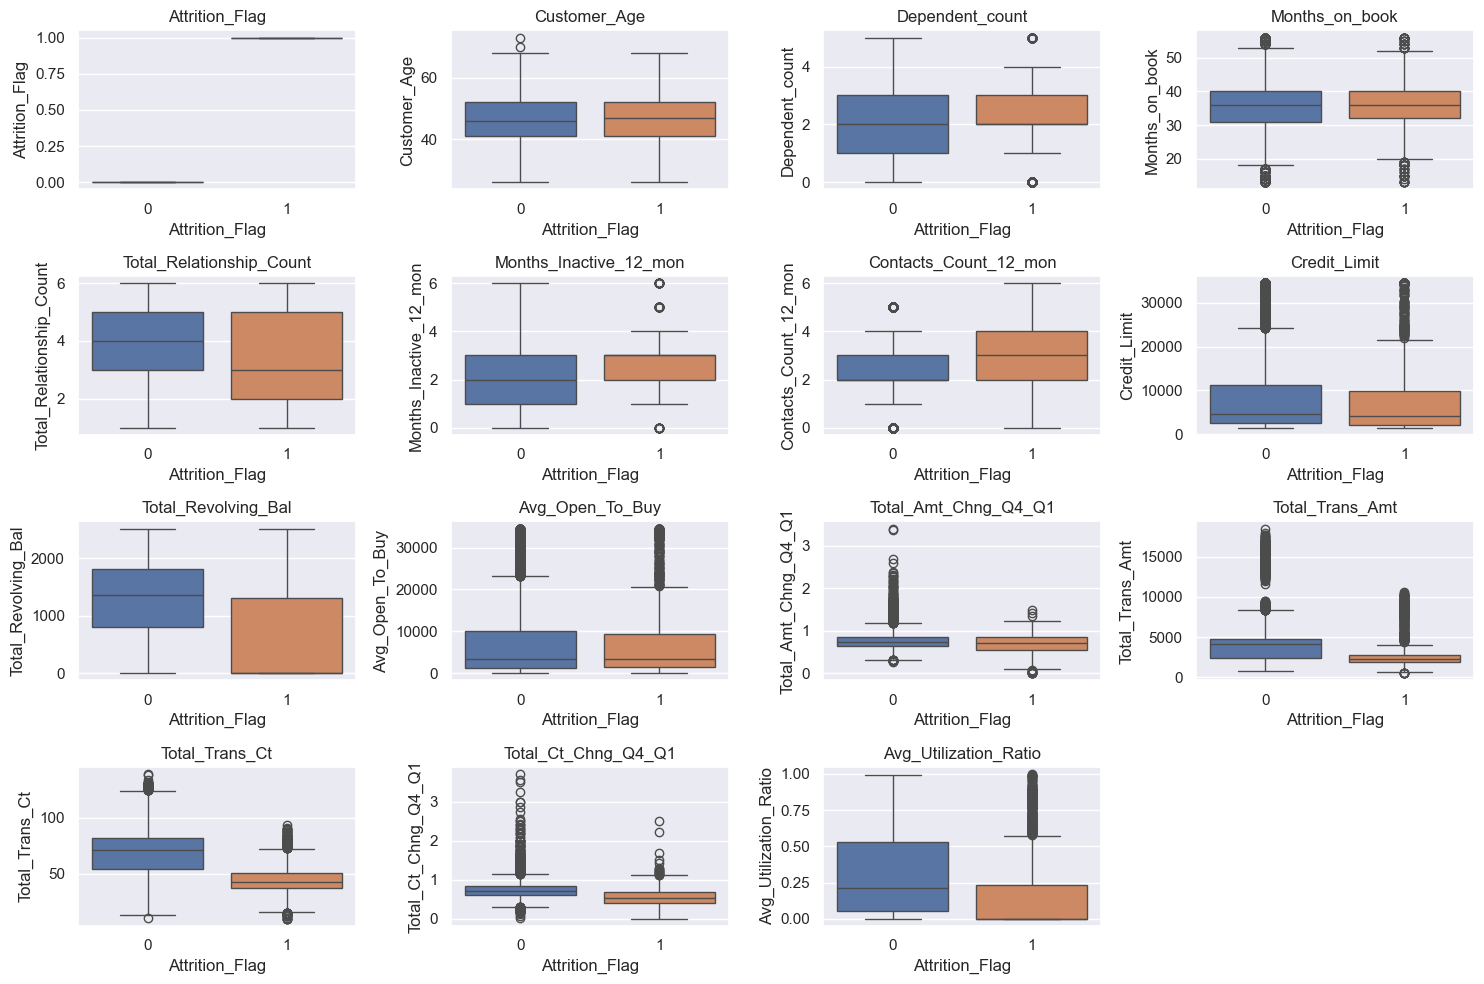

In [55]:
box_plots(num_cols, 'Attrition_Flag');

---
##### Observations (Boxplots):
- The boxplots for Customer_Age, Months_on_book, and Avg_Open_To_Buy are almost identical for both groups.
- So these 3 features are not directly linked to Attrition. 
---

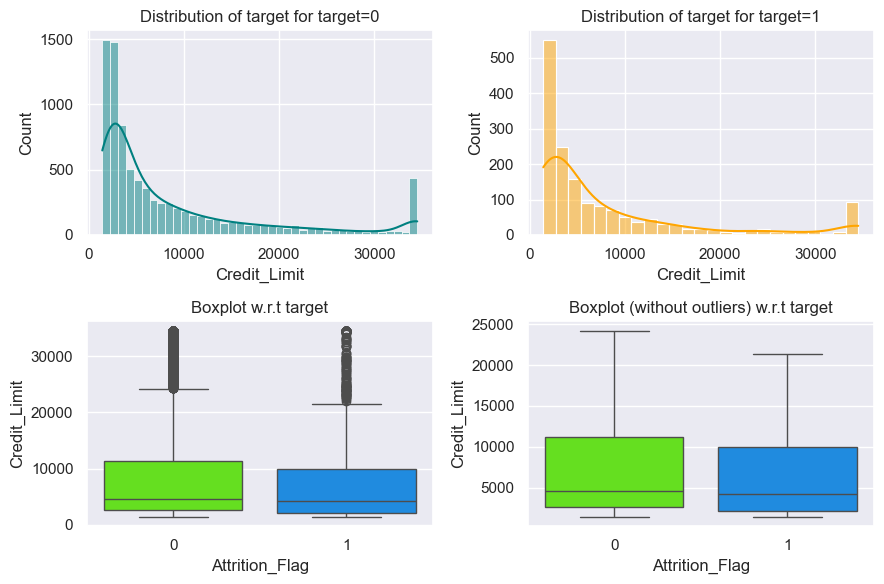

In [56]:
distribution_plot_wrt_target(df, 'Credit_Limit', 'Attrition_Flag')

---
##### Observations ('Credit_Limit', 'Attrition_Flag'):
- Credit_Limit histograms are right skewed for both groups.
- The peak is at the min about \\$1438 and a visible outlier bin near the max about \\$34k for both groups.
- The boxplot for Atrrited has a lower median and a lower inter-quartile range.
- This data shows that churners might have less Credit Limit.
---

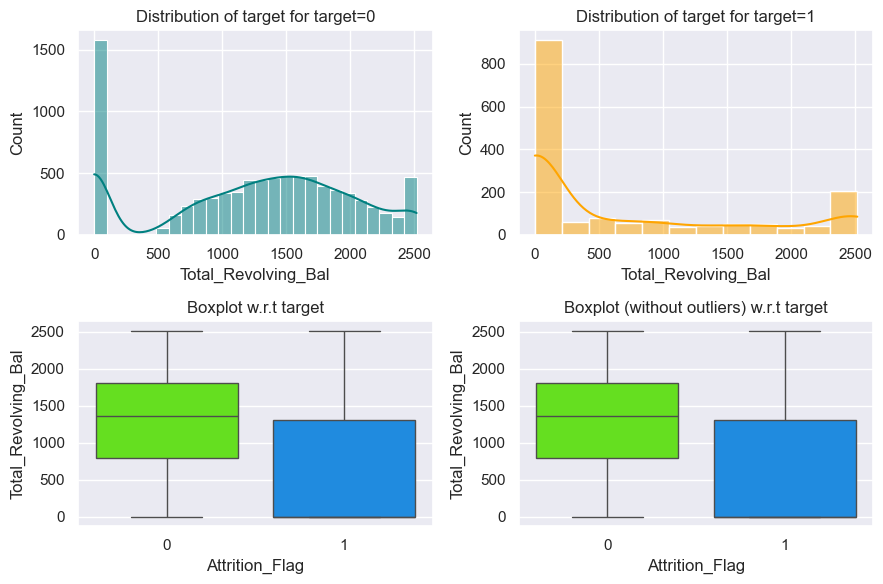

In [57]:
distribution_plot_wrt_target(df, 'Total_Revolving_Bal', 'Attrition_Flag')

In [58]:
print('The 1st quantile of the boxplot for Existing Customers is ', \
      df[df.Attrition_Flag == 0]['Total_Revolving_Bal'].quantile(0.25))

The 1st quantile of the boxplot for Existing Customers is  800.0


---
##### Observations ('Total_Revolving_Bal', 'Attrition_Flag'):
- Total_Revolving_Bal histograms are right skewed for both groups.
- The peak is at the min of \\$0 balance and the data spreads to the max at \\$2500 for both groups.
- The boxplot for Atrrited is much lower and does not have a lower whisker.
- The median of the Existing Customer boxplot lies outside of the upper quartile of the Attrited Customer boxplot.
- This data shows that churners might have less Total Revolving Balance.
---

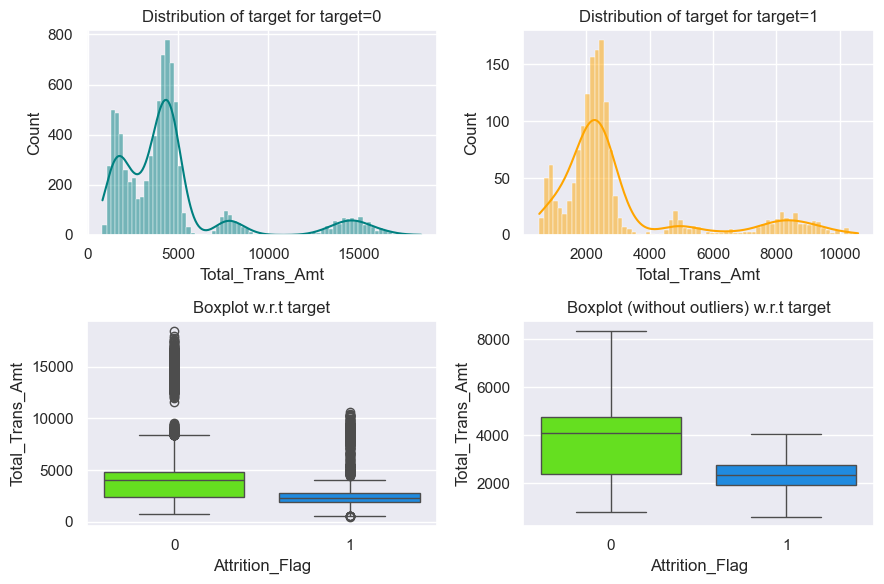

In [59]:
distribution_plot_wrt_target(df, 'Total_Trans_Amt', 'Attrition_Flag')

In [60]:
print('The 1st quantile of the boxplot for Existing Customers is ', \
      df[df.Attrition_Flag == 0]['Total_Trans_Amt'].quantile(0.25))

The 1st quantile of the boxplot for Existing Customers is  2384.75


---
##### Observations ('Total_Trans_Amt', 'Attrition_Flag'):
- Total_Trans_Amt histograms are right skewed for both groups.
- The peak for Existing Customers is around \\$4509, and the peak for Atrrited is around \\$2312.
- The boxplot for Atrrited is much lower.
- This data shows that churners might have less Total Transaction Amount.
---

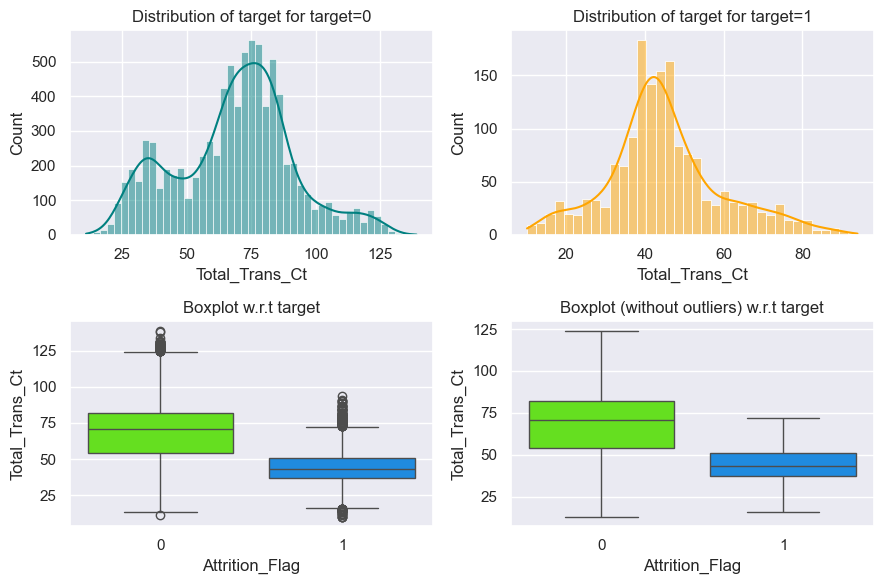

In [61]:
distribution_plot_wrt_target(df, 'Total_Trans_Ct', 'Attrition_Flag')

In [62]:
print('The 3rd quantile of the boxplot for Attrited Customers is ', \
      df[df.Attrition_Flag == 1]['Total_Trans_Ct'].quantile(0.25))

The 3rd quantile of the boxplot for Attrited Customers is  37.0


---
##### Observations ('Total_Trans_Ct', 'Attrition_Flag'):
- Total_Trans_Amt histograms are normally distributed for both groups.
- The peak for Existing Customers is around 75, and the peak for Atrrited is around 40.
- The boxplot for Atrrited is much lower, below the 1st quantile of the Existing Customer boxplot.
- This data shows that churners might have a lot less Total Transaction Count.
---

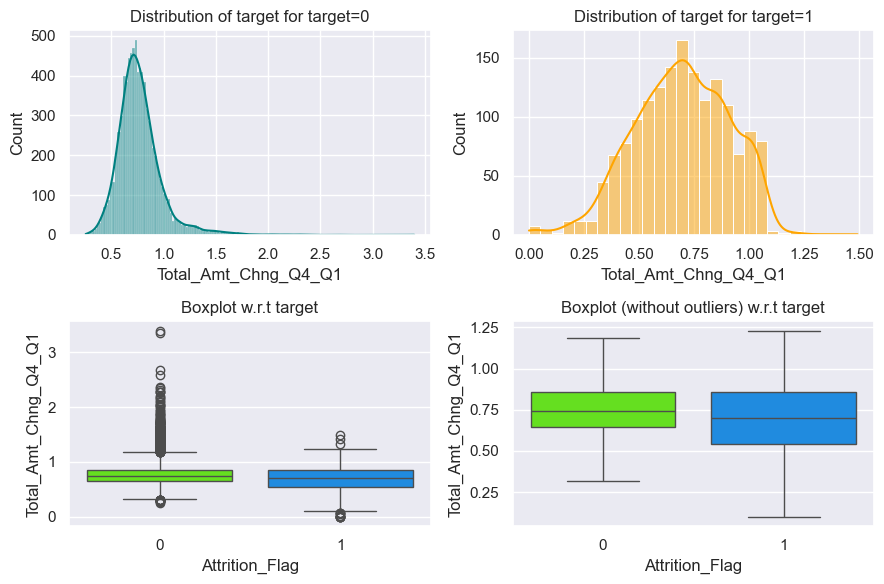

In [63]:
distribution_plot_wrt_target(df, 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag')

---
##### Observations ('Total_Amt_Chng_Q4_Q1', 'Attrition_Flag'):
- Total_Amt_Chng_Q4_Q1 histograms are symmetrically distributed for both groups.
- The peak is around 0.75 for both groups.
- The boxplot for Atrrited is a bit lower.
- This data shows that both groups on average spent 85% more in the 4th quarter compared to the 1st quarter.
- The ratio change in transaction amount between Q4 and Q1 is lower for the Atrrited customers.
---

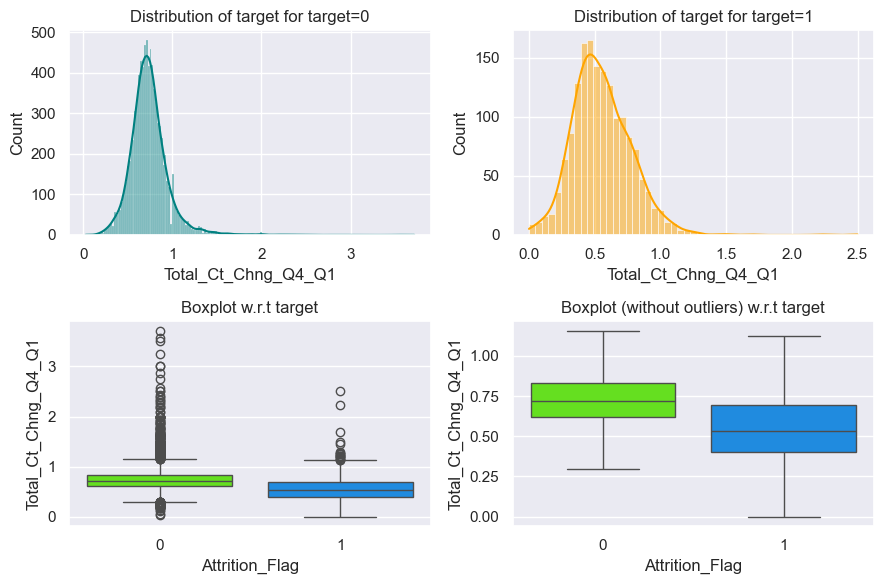

In [64]:
distribution_plot_wrt_target(df, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

In [65]:
print('The 1st quantile of the boxplot for Existing Customers is ', \
      df[df.Attrition_Flag == 0]['Total_Ct_Chng_Q4_Q1'].quantile(0.25))

The 1st quantile of the boxplot for Existing Customers is  0.617


---
##### Observations ('Total_Ct_Chng_Q4_Q1', 'Attrition_Flag'):
- Total_Amt_Chng_Q4_Q1 histograms are symmetrically distributed for both groups.
- The peak is around 0.76 for both groups.
- The boxplot for Atrrited is much lower.
- This data shows that on average the Existing Customers spend about 75% more and the Attrited Customers spend about 50% more in the 4th quarter than the 1st quarter.
---

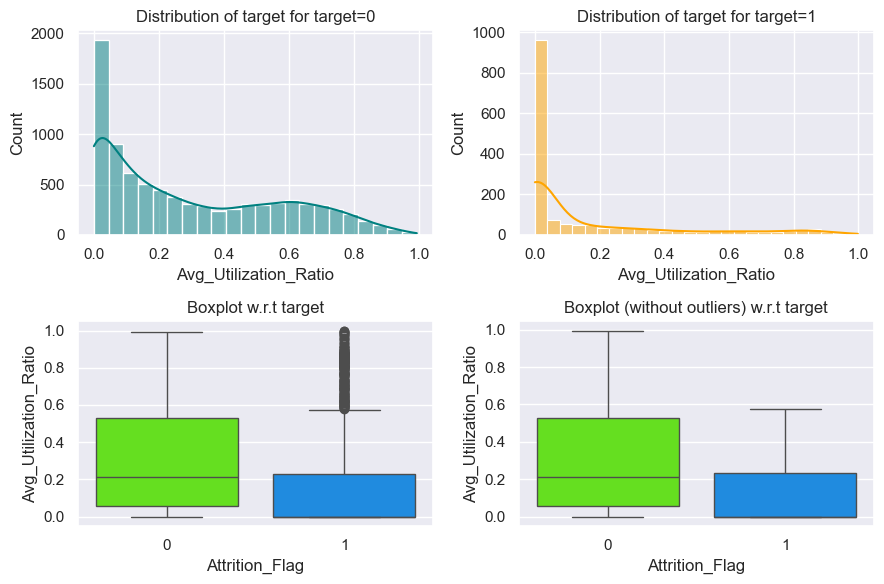

In [66]:
distribution_plot_wrt_target(df, 'Avg_Utilization_Ratio', 'Attrition_Flag')

---
##### Observations ('Avg_Utilization_Ratio' vs 'Attrition_Flag'):
- Avg_Utilization_Ratio histograms are right skewed for both groups. 
- The peak is at 0 for both groups.
- The boxplot for Atrrited is much lower and does not have the lower whisker.
- This data shows that churners might have a very low Average Card Utilization Ratio.
---

Attrition_Flag     0     1    All  % of 0  % of 1
Gender                                           
All             8500  1627  10127  83.930  16.070
F               4428   930   5358  82.640  17.360
M               4072   697   4769  85.380  14.620
------------------------------------------------------------------------------------------------------------------------


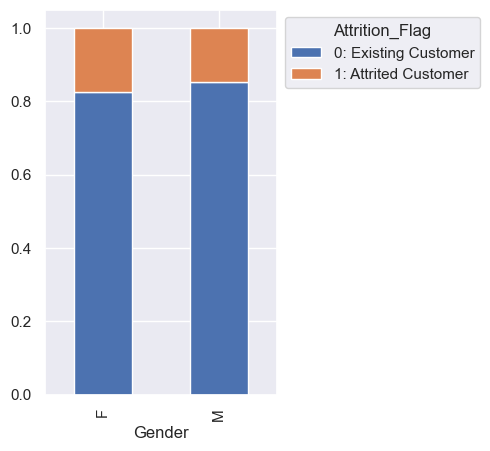

In [67]:
stacked_barplot(df, 'Gender', 'Attrition_Flag');

---
##### Observations (Gender vs Attrition_Flag):
- Both gender have similar percentage in the attrition.
- So, we can't directly link gender to the attrition.
---

Attrition_Flag      0     1    All  % of 0  % of 1
Dependent_count                                   
All              8500  1627  10127  83.930  16.070
3                2250   482   2732  82.360  17.640
2                2238   417   2655  84.290  15.710
1                1569   269   1838  85.360  14.640
4                1314   260   1574  83.480  16.520
0                 769   135    904  85.070  14.930
5                 360    64    424  84.910  15.090
------------------------------------------------------------------------------------------------------------------------


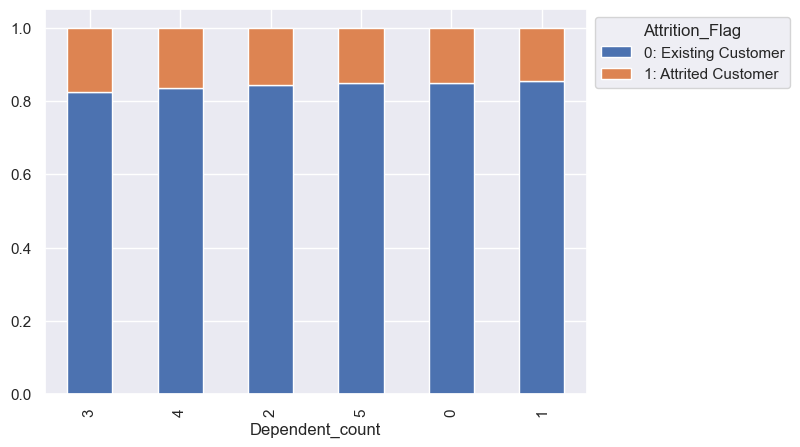

In [68]:
stacked_barplot(df, 'Dependent_count', 'Attrition_Flag');

---
##### Observations (Dependent_count vs Attrition_Flag):
- All number of dependents exist in both groups with similar percentages.
- So, we can't directly link Dependent_count to the attrition.
---

Attrition_Flag      0     1   All  % of 0  % of 1
Education_Level                                  
All              7237  1371  8608  84.070  15.930
Graduate         2641   487  3128  84.430  15.570
High School      1707   306  2013  84.800  15.200
Uneducated       1250   237  1487  84.060  15.940
College           859   154  1013  84.800  15.200
Doctorate         356    95   451  78.940  21.060
Post-Graduate     424    92   516  82.170  17.830
------------------------------------------------------------------------------------------------------------------------


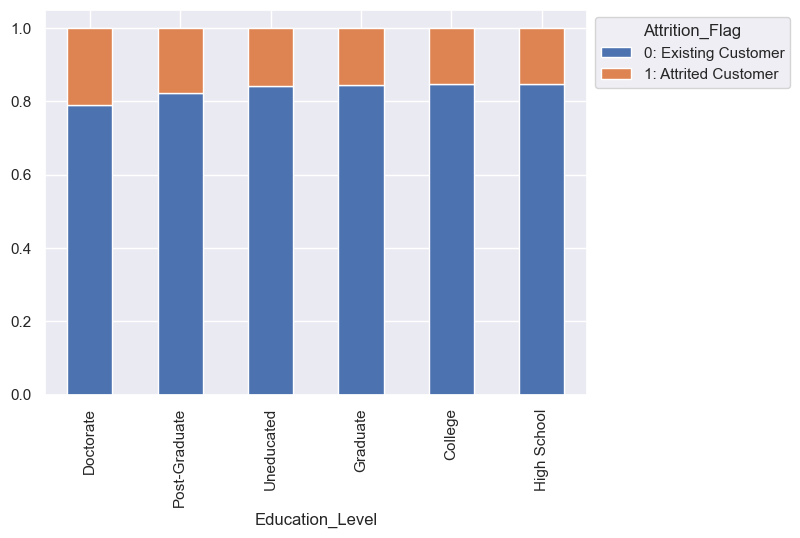

In [69]:
stacked_barplot(df, 'Education_Level', 'Attrition_Flag');

---
##### Observations (Education_Level vs Attrition_Flag):
- The Doctorate has the highest attrition rate at 21%. 
- So, we can assume that Doctorate people are more likely to churn than others eventhough their population is smaller.
---

Attrition_Flag     0     1   All  % of 0  % of 1
Marital_Status                                  
All             7880  1498  9378  84.030  15.970
Married         3978   709  4687  84.870  15.130
Single          3275   668  3943  83.060  16.940
Divorced         627   121   748  83.820  16.180
------------------------------------------------------------------------------------------------------------------------


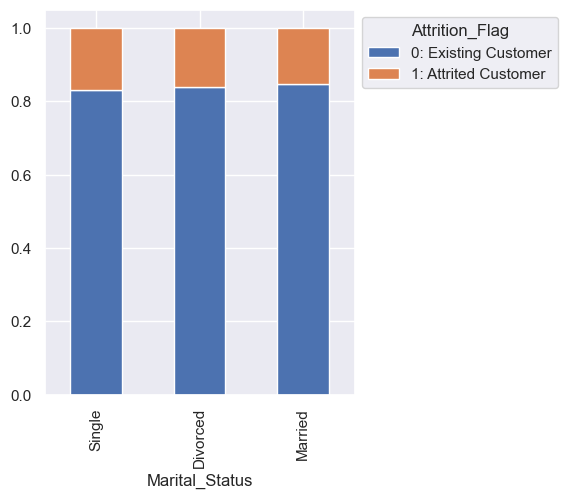

In [70]:
stacked_barplot(df, 'Marital_Status', 'Attrition_Flag');

---
##### Observations (Marital_Status vs Attrition_Flag):
- All 3 Marital_Status have similar percentage in both groups. 
- So, we can't directly link Marital_Status to the attrition.
---

Attrition_Flag      0     1   All  % of 0  % of 1
Income_Category                                  
All              7575  1440  9015  84.030  15.970
Less than $40K   2949   612  3561  82.810  17.190
$40K - $60K      1519   271  1790  84.860  15.140
$80K - $120K     1293   242  1535  84.230  15.770
$60K - $80K      1213   189  1402  86.520  13.480
$120K +           601   126   727  82.670  17.330
------------------------------------------------------------------------------------------------------------------------


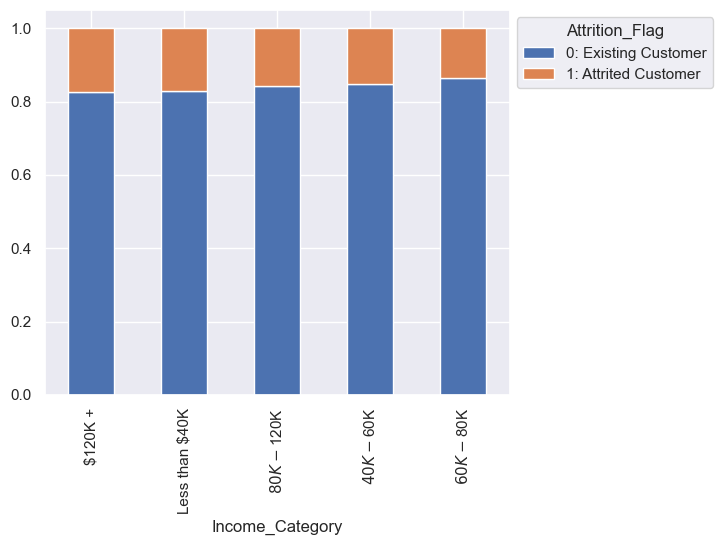

In [71]:
stacked_barplot(df, 'Income_Category', 'Attrition_Flag');

---
##### Observations (Income_Category vs Attrition_Flag):
- The Income_Category of 40k less and \\$120k plus have more percentage in the attrition at 17%.
- So, we can assume that maybe the \\$120k plus people are associated with the Doctorate that churn.
- But, the 40k less people may have higher percentage in churn because they're the majority overall.
---

Attrition_Flag     0     1    All  % of 0  % of 1
Card_Category                                    
All             8500  1627  10127  83.930  16.070
Blue            7917  1519   9436  83.900  16.100
Silver           473    82    555  85.230  14.770
Gold              95    21    116  81.900  18.100
Platinum          15     5     20  75.000  25.000
------------------------------------------------------------------------------------------------------------------------


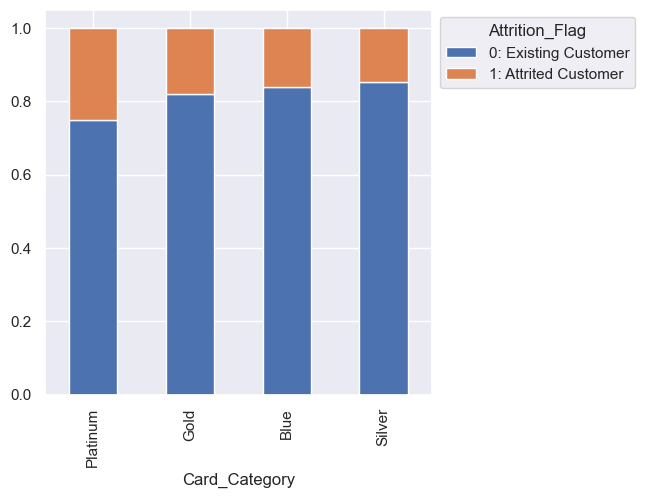

In [72]:
stacked_barplot(df, 'Card_Category', 'Attrition_Flag');

---
##### Observations (Card_Category vs Attrition_Flag):
- The Platinum card has the highest attrition rate at 25%. 
- So, we can assume that maybe Platinum card is associated with Doctorate that churn.
---

Attrition_Flag               0     1    All  % of 0  % of 1
Total_Relationship_Count                                   
All                       8500  1627  10127  83.930  16.070
3                         1905   400   2305  82.650  17.350
2                          897   346   1243  72.160  27.840
1                          677   233    910  74.400  25.600
5                         1664   227   1891  88.000  12.000
4                         1687   225   1912  88.230  11.770
6                         1670   196   1866  89.500  10.500
------------------------------------------------------------------------------------------------------------------------


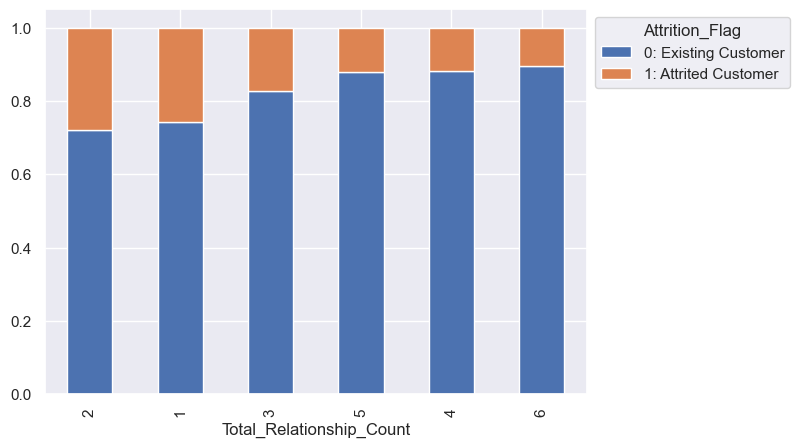

In [73]:
stacked_barplot(df, 'Total_Relationship_Count', 'Attrition_Flag');

---
##### Observations (Total_Relationship_Count vs Attrition_Flag):
- The Total_Relationship_Count of 2 and 1 have the highest attrition rate at 28% and 25% respectively. 
- So, we can assume that people with 1 or 2 products are more likely to churn.
---

Attrition_Flag             0     1    All  % of 0  % of 1
Months_Inactive_12_mon                                   
All                     8500  1627  10127  83.930  16.070
3                       3020   826   3846  78.520  21.480
2                       2777   505   3282  84.610  15.390
4                        305   130    435  70.110  29.890
1                       2133   100   2233  95.520   4.480
5                        146    32    178  82.020  17.980
6                        105    19    124  84.680  15.320
0                         14    15     29  48.280  51.720
------------------------------------------------------------------------------------------------------------------------


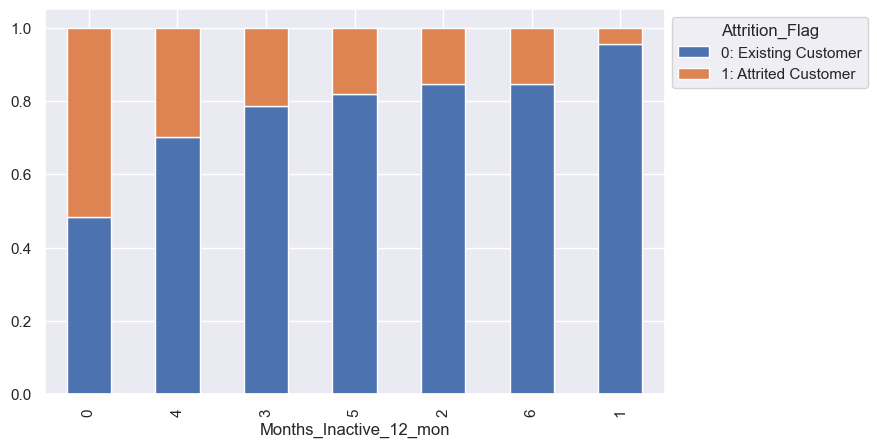

In [74]:
stacked_barplot(df, 'Months_Inactive_12_mon', 'Attrition_Flag');

---
##### Observations (Months_Inactive_12_mon vs Attrition_Flag):
- The number of months inactive of 3 and 4 have higher attrition rate at 21% and 30% respectively.
- The number of months inactive of 0 has higher attrition rate too at 52% but their population is only 29 people.
- The distribution Months_Inactive_12_mon is significant for those with 3 and 4 months inactive.
- We can assume that people with 4 months inactive are more likely to churn.
---

Attrition_Flag            0     1    All  % of 0  % of 1
Contacts_Count_12_mon                                   
All                    8500  1627  10127  83.930  16.070
3                      2699   681   3380  79.850  20.150
2                      2824   403   3227  87.510  12.490
4                      1077   315   1392  77.370  22.630
1                      1391   108   1499  92.800   7.200
5                       117    59    176  66.480  33.520
6                         0    54     54   0.000 100.000
0                       392     7    399  98.250   1.750
------------------------------------------------------------------------------------------------------------------------


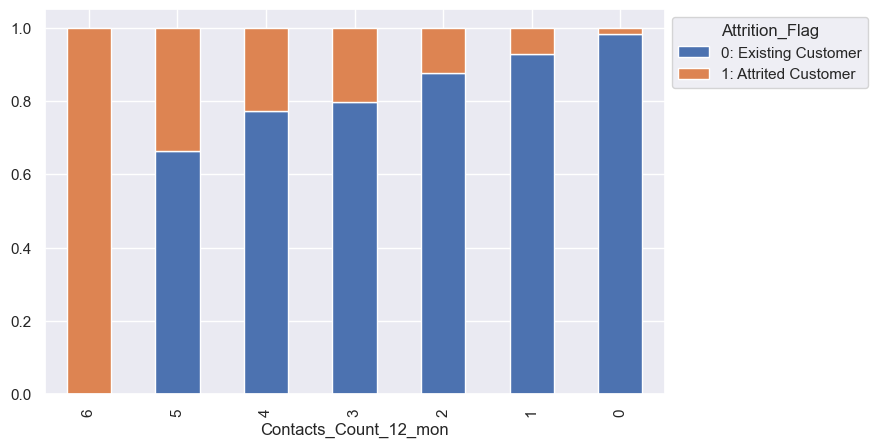

In [75]:
stacked_barplot(df, 'Contacts_Count_12_mon', 'Attrition_Flag');

---
##### Observations (Contacts_Count_12_mon vs Attrition_Flag):
- The number of contacts of 5 and 6 have higher attrition rate at 33% and 100% respectively.
- We can assume that the people with 5 or 6 number of contacts are more likely to churn
---

## Data Pre-processing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### 1. Missing value treatment & other preprocessing steps

In [76]:
df1 = df.copy()

In [77]:
df1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

#### 2. Feature engineering 

In [78]:
# Dropping these 3 columns to avoid multicollinearity and to generalize the model 
# We'll reference these features if necessary in the feature importance.
df1.drop(columns=['Avg_Open_To_Buy', 'Customer_Age', 'Total_Trans_Amt'], inplace=True)

#### 3. Outlier detection and treatment

In [79]:
# Summary of outliers

In [80]:
sum_outliers(df1)

Attrition_Flag             16.066
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

The above statistic shows that the outliers seem correct and reflect real world data.  
So, we will not remove them but will apply standard scaler.

#### 4. Preparing data for modeling

In [81]:
# Separating the independent and dependent variables
X = df1.drop(['Attrition_Flag'], axis=1)
y = df1['Attrition_Flag']

# Splitting data into training, validation, and test set:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp) 
print(X_train.shape, X_val.shape, X_test.shape)


(6075, 16) (2026, 16) (2026, 16)


### Missing value imputation & Encoding categorical variables

In [82]:
# Create lists for numerical columns and categorical columns

num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()
print('Numerical Columns', '\n', num_cols, '\n\n', 'Categorical Columns', '\n', cat_cols)

Numerical Columns 
 ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] 

 Categorical Columns 
 ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [83]:
# Define sklearn transformers to apply SimpleImputer, StandardScaler, and ONeHotEncoding.

numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)),
    ]
)

preprocessing = ColumnTransformer(transformers = [  
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols),
    ],
    remainder='passthrough',
    n_jobs = -1                                 
)

#### <font color='blue'> Pipeline </font>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [84]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    '''
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            'Accuracy': acc,
            'Recall': recall,
            'Precision': precision,
            'F1': f1

        },
        index=[0],
    )

    return df_perf

# Function to plot confustion matrix with percentage
def confusion_matrix_sklearn(model, predictors, target):
    '''
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model Building with original data

Sample code for model building with original data

In [85]:
# function to add all models to a list with default parameters
def add_models_tolist():
    mdl = []
    mdl.append(('Bagging', BaggingClassifier(random_state=1)))
    mdl.append(('Random forest', RandomForestClassifier(random_state=1)))
    mdl.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
    mdl.append(('GradientBoost', GradientBoostingClassifier(random_state=1)))
    mdl.append(('XGBoost', XGBClassifier(random_state=1)))
    mdl.append(('Dtree', DecisionTreeClassifier(random_state=1)))
    mdl.append(('Logistic Regression', LogisticRegression(random_state=1)))
    return mdl

# function to display the performance scores for train or test data
def perf_train_pipe(models, predictors, target, step):    
    models_perf_train = pd.DataFrame()
    for name, model in models:
        pipe = imbPipeline(steps=[ ('preprocess', preprocessing),
                                ('optional', step),
                                ('classifier', model) ])
                               
        model = pipe.fit(predictors, target)
        model_perf = model_performance_classification_sklearn(model, predictors, target)
        models_perf_train = pd.concat([models_perf_train, model_perf.T], axis=1, ignore_index=True)    
    cols, _ = map(list, zip(*models))    
    models_perf_train.columns = cols    
    return models_perf_train

# function to display the performance scores for validation data
def perf_val_pipe(models, predictors, target, step):    
    models_perf_train = pd.DataFrame()
    for name, model in models:
        pipe = imbPipeline(steps=[ ('preprocess', preprocessing),
                                ('optional', step),
                                ('classifier', model) ])
                               
        model = pipe.fit(predictors, target)
        model_perf = model_performance_classification_sklearn(model, X_val, y_val)
        models_perf_train = pd.concat([models_perf_train, model_perf.T], axis=1, ignore_index=True)        
    cols, _ = map(list, zip(*models))    
    models_perf_train.columns = cols
    return models_perf_train

In [86]:
best_models = [] # Define a list to store the best models found
models = add_models_tolist() # getting a list of models from a function

In [87]:
# Using the above-defined functions to get performance scores
print('\n' 'Training Performance:' '\n')
display(perf_train_pipe(models, X_train, y_train, None))
print('\n' 'Validation Performance:' '\n')
display(perf_val_pipe(models, X_train, y_train, None))


Training Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.993,1.000,0.927,0.943,1.000,1.000,0.896
Recall,0.958,1.000,0.714,0.736,0.999,1.000,0.524
Precision,0.997,1.000,0.807,0.893,1.000,1.000,0.753
F1,0.977,1.000,0.758,0.807,0.999,1.000,0.618



Validation Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.920,0.930,0.931,0.935,0.941,0.888,0.906
Recall,0.656,0.684,0.733,0.730,0.767,0.656,0.567
Precision,0.811,0.851,0.818,0.844,0.853,0.652,0.787
F1,0.725,0.759,0.773,0.783,0.808,0.654,0.660


---
##### Observations (Original data):
- GradientBoost recall values: Training 0.736 - Validation 0.730
- This seems the best-generalized model with an accuracy score of 0.935 on validation.
---

In [88]:
# Add GradientBoost to one of the best models
best_models.append(models[3])

In [147]:
# Resample the dataset for display only
X_train_orig = preprocessing.fit_transform(X_train)
y_train_orig = y_train
print('The original data after preprocessing, the shape of X_train: {}'.format(X_train_orig.shape))
print('The original data after preprocessing, the shape of y_train: {} \n'.format(y_train_orig.shape))
X_train_orig.head()

The original data after preprocessing, the shape of X_train: (6075, 26)
The original data after preprocessing, the shape of y_train: (6075,) 



,num__Dependent_count,num__Months_on_book,num__Total_Relationship_Count,num__Months_Inactive_12_mon,num__Contacts_Count_12_mon,num__Credit_Limit,num__Total_Revolving_Bal,num__Total_Amt_Chng_Q4_Q1,num__Total_Trans_Ct,num__Total_Ct_Chng_Q4_Q1,num__Avg_Utilization_Ratio,cat__Gender_M,cat__Education_Level_Doctorate,cat__Education_Level_Graduate,cat__Education_Level_High School,cat__Education_Level_Post-Graduate,cat__Education_Level_Uneducated,cat__Marital_Status_Married,cat__Marital_Status_Single,cat__Income_Category_$40K - $60K,cat__Income_Category_$60K - $80K,cat__Income_Category_$80K - $120K,cat__Income_Category_Less than $40K,cat__Card_Category_Gold,cat__Card_Category_Platinum,cat__Card_Category_Silver
800,-0.262,-1.884,1.393,1.642,0.495,1.254,0.515,-1.361,-0.800,-0.747,-0.720,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
498,-1.031,-0.248,1.393,-0.337,-2.209,-0.633,0.874,-1.728,-1.439,-0.334,1.367,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
4356,1.274,0.003,0.752,-1.326,-0.406,-0.203,1.636,0.531,0.606,0.706,0.329,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
407,-0.262,0.003,1.393,-0.337,-2.209,2.017,-1.447,-0.692,-1.098,-1.721,-1.009,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
8728,1.274,0.003,-1.173,-0.337,0.495,0.702,0.214,-0.022,0.819,0.159,-0.684,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000


### Model Building with Oversampled data


In [151]:
print('Before Oversampling, counts of label "Yes": {}'.format(sum(y_train == 1)))
print('Before Oversampling, counts of label "No": {} \n'.format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  

# Resample the dataset for display only
sm_pipe = imbPipeline(steps=[ ('preprocess', preprocessing),
                                ('smote', sm) ])                               
X_train_over, y_train_over = sm_pipe.fit_resample(X_train, y_train)


print('After Oversampling, counts of label "Yes": {}'.format(sum(y_train_over == 1)))
print('After Oversampling, counts of label "No": {} \n'.format(sum(y_train_over == 0)))

print('After Oversampling, the shape of X_train: {}'.format(X_train_over.shape))
print('After Oversampling, the shape of y_train: {} \n'.format(y_train_over.shape))

print('Data overview')
X_train_over.head()


Before Oversampling, counts of label "Yes": 976
Before Oversampling, counts of label "No": 5099 

After Oversampling, counts of label "Yes": 5099
After Oversampling, counts of label "No": 5099 

After Oversampling, the shape of X_train: (10198, 26)
After Oversampling, the shape of y_train: (10198,) 

Data overview


,num__Dependent_count,num__Months_on_book,num__Total_Relationship_Count,num__Months_Inactive_12_mon,num__Contacts_Count_12_mon,num__Credit_Limit,num__Total_Revolving_Bal,num__Total_Amt_Chng_Q4_Q1,num__Total_Trans_Ct,num__Total_Ct_Chng_Q4_Q1,num__Avg_Utilization_Ratio,cat__Gender_M,cat__Education_Level_Doctorate,cat__Education_Level_Graduate,cat__Education_Level_High School,cat__Education_Level_Post-Graduate,cat__Education_Level_Uneducated,cat__Marital_Status_Married,cat__Marital_Status_Single,cat__Income_Category_$40K - $60K,cat__Income_Category_$60K - $80K,cat__Income_Category_$80K - $120K,cat__Income_Category_Less than $40K,cat__Card_Category_Gold,cat__Card_Category_Platinum,cat__Card_Category_Silver
0,-0.262,-1.884,1.393,1.642,0.495,1.254,0.515,-1.361,-0.800,-0.747,-0.720,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,-1.031,-0.248,1.393,-0.337,-2.209,-0.633,0.874,-1.728,-1.439,-0.334,1.367,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
2,1.274,0.003,0.752,-1.326,-0.406,-0.203,1.636,0.531,0.606,0.706,0.329,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
3,-0.262,0.003,1.393,-0.337,-2.209,2.017,-1.447,-0.692,-1.098,-1.721,-1.009,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
4,1.274,0.003,-1.173,-0.337,0.495,0.702,0.214,-0.022,0.819,0.159,-0.684,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000


In [90]:
# Using the above defined functions to get performance scores
print('\n' 'Training Performance:' '\n')
display(perf_train_pipe(models, X_train, y_train, sm))
print('\n' 'Validation Performance:' '\n')
display(perf_val_pipe(models, X_train, y_train, sm))


Training Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.996,1.000,0.907,0.941,0.999,1.000,0.831
Recall,0.989,1.000,0.809,0.833,0.997,1.000,0.814
Precision,0.987,1.000,0.678,0.805,0.998,1.000,0.484
F1,0.988,1.000,0.738,0.819,0.997,1.000,0.607



Validation Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.916,0.930,0.902,0.932,0.938,0.886,0.834
Recall,0.715,0.752,0.794,0.807,0.782,0.718,0.831
Precision,0.749,0.803,0.662,0.778,0.825,0.629,0.490
F1,0.732,0.777,0.722,0.792,0.803,0.670,0.617


---
##### Observations (Oversampled data):
- AdaBoost recall values: Training 0.809 - Validation 0.794
- This seems the best-generalized model with an accuracy score of 0.902 on validation.
- Other models seem overfitting, except Logistic Regression.
---

In [91]:
# Add Logistic Regression to one of the best models
best_models.append(models[2])

### Model Building with Undersampled data

In [153]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)

# The below code is to resample data to a new dataset for display only
# The pipeline will do this process internally with np array.

un_pipe = imbPipeline(steps=[ ('preprocess', preprocessing),
                                ('undersampler', rus) ])                            
X_train_un, y_train_un = un_pipe.fit_resample(X_train, y_train)

print('Before Under Sampling, counts of label "Yes": {}'.format(sum(y_train == 1)))
print('Before Under Sampling, counts of label "No": {} \n'.format(sum(y_train == 0)))

print('After Under Sampling, counts of label "Yes": {}'.format(sum(y_train_un == 1)))
print('After Under Sampling, counts of label "No": {} \n'.format(sum(y_train_un == 0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

print('Data overview')
X_train_un.head()


Before Under Sampling, counts of label "Yes": 976
Before Under Sampling, counts of label "No": 5099 

After Under Sampling, counts of label "Yes": 976
After Under Sampling, counts of label "No": 976 

After Under Sampling, the shape of train_X: (1952, 26)
After Under Sampling, the shape of train_y: (1952,) 

Data overview


,num__Dependent_count,num__Months_on_book,num__Total_Relationship_Count,num__Months_Inactive_12_mon,num__Contacts_Count_12_mon,num__Credit_Limit,num__Total_Revolving_Bal,num__Total_Amt_Chng_Q4_Q1,num__Total_Trans_Ct,num__Total_Ct_Chng_Q4_Q1,num__Avg_Utilization_Ratio,cat__Gender_M,cat__Education_Level_Doctorate,cat__Education_Level_Graduate,cat__Education_Level_High School,cat__Education_Level_Post-Graduate,cat__Education_Level_Uneducated,cat__Marital_Status_Married,cat__Marital_Status_Single,cat__Income_Category_$40K - $60K,cat__Income_Category_$60K - $80K,cat__Income_Category_$80K - $120K,cat__Income_Category_Less than $40K,cat__Card_Category_Gold,cat__Card_Category_Platinum,cat__Card_Category_Silver
0,0.506,-0.626,-0.532,0.652,1.396,0.545,0.010,-0.957,0.478,0.230,-0.695,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
1,-0.262,0.507,0.752,-1.326,0.495,-0.701,-1.447,-0.413,0.435,-0.756,-1.009,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
2,-0.262,0.003,-1.173,-0.337,-0.406,-0.568,-0.526,-0.259,2.352,0.113,-0.228,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.274,0.003,-1.173,-0.337,0.495,0.702,0.214,-0.022,0.819,0.159,-0.684,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
4,-1.031,0.884,-0.532,-0.337,0.495,0.951,1.636,3.208,-1.354,2.039,-0.485,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000


In [93]:
# Using above defined functions to get performance scores
print('\n' 'Training Performance:' '\n')
display(perf_train_pipe(models, X_train, y_train, rus))
print('\n' 'Validation Performance:' '\n')
display(perf_val_pipe(models, X_train, y_train, rus))


Training Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.921,0.923,0.875,0.904,0.925,0.871,0.823
Recall,0.989,1.000,0.894,0.947,1.000,1.000,0.830
Precision,0.672,0.677,0.571,0.635,0.682,0.555,0.471
F1,0.800,0.807,0.697,0.760,0.811,0.714,0.601



Validation Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.884,0.890,0.878,0.902,0.903,0.820,0.823
Recall,0.847,0.880,0.893,0.887,0.902,0.825,0.837
Precision,0.597,0.609,0.579,0.642,0.641,0.466,0.472
F1,0.701,0.720,0.702,0.745,0.749,0.596,0.604


---
##### Observations (Undersampled data):
- Logistic Regression recall values: Training 0.830 - Validation 0.837
- This seems the best-generalized model with an accuracy score of 0.823 on validation.
- However, other models seem doing very well. 
---

In [94]:
# Add AdaBoost to one of the best models
best_models.append(models[6])

### HyperparameterTuning

#### <font color='blue'> Sample Parameter Grids </font>

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


In [95]:
# function to create a list of parameters
def create_params():
    param_grids = []
    #0 For Bagging Classifier:
    param_grid = {
        'max_samples': [0.8,0.9,1],
        'max_features': [0.7,0.8,0.9],
        'n_estimators' : [30,50,70],
    }
    param_grids.append(param_grid)
    
    #1 For Random Forest:
    param_grid = {
        'n_estimators': [50,110,25],
        'min_samples_leaf': np.arange(1, 4),
        'max_features': [np.arange(0.3, 0.6, 0.1),'sqrt'],
        'max_samples': np.arange(0.4, 0.7, 0.1)
    }
    param_grids.append(param_grid)
    
    #2 For Adaboost:
    param_grid = {
        'n_estimators': np.arange(50,110,25),
        'learning_rate': [0.01,0.1,0.05],
        'base_estimator': [
            DecisionTreeClassifier(max_depth=2, random_state=1),
            DecisionTreeClassifier(max_depth=3, random_state=1),
        ],
    }
    param_grids.append(param_grid)
    
    #3 For Gradient Boosting:
    param_grid = {
        'init': [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
        'n_estimators': np.arange(50,110,25),
        'learning_rate': [0.01,0.1,0.05],
        'subsample':[0.7,0.9],
        'max_features':[0.5,0.7,1],
    }
    param_grids.append(param_grid)
    
    #4 For XGBoost (optional):
    param_grid={'n_estimators':np.arange(50,110,25),
                'scale_pos_weight':[1,2,5],
                'learning_rate':[0.01,0.1,0.05],
                'gamma':[1,3],
                'subsample':[0.7,0.9]
    }
    param_grids.append(param_grid)
    
    #5 For Decision Trees:
    param_grid = {
        'max_depth': np.arange(2,6),
        'min_samples_leaf': [1, 4, 7],
        'max_leaf_nodes' : [10, 15],
        'min_impurity_decrease': [0.0001,0.001]
    }
    param_grids.append(param_grid)
    
    #6 For Logistic Regression:
    param_grid ={
        'max_iter' : range(100, 500),
        'warm_start' : [True, False],
        'solver' : ['lbfgs', 'newton-cg', 'liblinear'],
        'C' : np.arange(0, 1, 0.01),
    }
    param_grids.append(param_grid)

    return param_grids

#### <font color='blue'> Tuning with RandomizedSearchCV </font>

Documentation reference: 
[Imbalanced-learn documentation: For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__'](https://imbalanced-learn.org/dev/references/generated/imblearn.pipeline.Pipeline.html#:~:text=For%20this%2C%20it%20enables%20setting%20parameters%20of%20the%20various%20steps%20using%20their%20names%20and%20the%20parameter%20name%20separated%20by%20a%20%E2%80%98__%E2%80%99)

In [96]:
# get the list of parameters from the above function
param_list = []
param_list = create_params()

tuned_models = []
scorer = metrics.make_scorer(metrics.recall_score)

''' another for loop: for index, item in enumerate(models):
                    name, model = item '''

# Iterate through each model and apply randomized search CV to find the best parameter for each model.
for (name, model), param_grid in zip(models, param_list):

    pipe = Pipeline(steps=[ ('preprocess', preprocessing),
                                ('classifier', model) ])

    # Documentation reference above
    new_params = {'classifier__' + key: param_grid[key] for key in param_grid}  
    
    randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=new_params, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)
    randomized_cv.fit(X_train, y_train)
    print('\n', name)
    print('Best parameters are {} with CV score={}:' .format(randomized_cv.best_params_,randomized_cv.best_score_))

    # reverse the parameters without the added names.
    tuned_models.append((name, model.set_params(**{k.split('__')[-1]: v for k, v in randomized_cv.best_params_.items()})))    



 Bagging
Best parameters are {'classifier__n_estimators': 50, 'classifier__max_samples': 0.9, 'classifier__max_features': 0.9} with CV score=0.6577551020408163:

 Random forest
Best parameters are {'classifier__n_estimators': 110, 'classifier__min_samples_leaf': 1, 'classifier__max_samples': 0.6, 'classifier__max_features': 'sqrt'} with CV score=0.6229356357927787:

 AdaBoost
Best parameters are {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.6906017791732078:

 GradientBoost
Best parameters are {'classifier__subsample': 0.9, 'classifier__n_estimators': 100, 'classifier__max_features': 0.5, 'classifier__learning_rate': 0.1, 'classifier__init': AdaBoostClassifier(random_state=1)} with CV score=0.6731658817373104:

 XGBoost
Best parameters are {'classifier__subsample': 0.9, 'classifier__scale_pos_weight': 5, 'classifier__n_estimators': 75, 'classifier__learning_rate': 0

#### <font color='blue'> Tuning using original data </font>

In [97]:
# Using the above-defined functions to get performance scores
print('\n' 'Training Performance:' '\n')
display(perf_train_pipe(tuned_models, X_train, y_train, None))
print('\n' 'Validation Performance:' '\n')
display(perf_val_pipe(tuned_models, X_train, y_train, None))


Training Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.999,0.992,0.952,0.943,0.945,0.920,0.895
Recall,0.996,0.955,0.782,0.734,0.969,0.616,0.522
Precision,1.000,0.997,0.905,0.894,0.758,0.843,0.752
F1,0.998,0.975,0.839,0.806,0.851,0.712,0.616



Validation Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.929,0.928,0.938,0.938,0.920,0.920,0.906
Recall,0.690,0.666,0.730,0.733,0.871,0.623,0.571
Precision,0.843,0.854,0.862,0.860,0.703,0.839,0.785
F1,0.759,0.748,0.791,0.791,0.778,0.715,0.661


---
##### Observations (Original data):
- GradientBoost recall values: Training 0.725 - Validation 0.736
- The previous GradientBoost model had similar scores. So, we'll skip this model. 
---

In [98]:
# Skip this GradientBoost to one of the best models

#### <font color='blue'> Tuning using Oversampled data </font>

In [99]:
# Using the above defined functions to get performance scores
print('\n' 'Training Performance:' '\n')
display(perf_train_pipe(tuned_models, X_train, y_train, sm))
print('\n' 'Validation Performance:' '\n')
display(perf_val_pipe(tuned_models, X_train, y_train, sm))


Training Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,1.000,0.997,0.952,0.939,0.903,0.867,0.831
Recall,0.999,0.994,0.809,0.837,0.995,0.825,0.815
Precision,0.998,0.985,0.884,0.795,0.623,0.559,0.484
F1,0.998,0.989,0.845,0.815,0.766,0.666,0.608



Validation Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.928,0.930,0.934,0.925,0.879,0.863,0.833
Recall,0.770,0.776,0.748,0.798,0.914,0.837,0.831
Precision,0.780,0.786,0.827,0.751,0.578,0.548,0.489
F1,0.775,0.781,0.786,0.774,0.708,0.663,0.616


---
##### Observations (Oversampled data):
- DecisionTree recall values: Training 0.825 - Validation 0.837
- This seems the best-generalized model with an accuracy score of 0.863 on validation.
---

In [100]:
# Add DecisionTree to one of the best models
best_models.append(tuned_models[5])

#### <font color='blue'> Tuning using undersampled data </font>

In [101]:
# Using the above defined functions to get performance scores
print('\n' 'Training Performance:' '\n')
display(perf_train_pipe(tuned_models, X_train, y_train, rus))
print('\n' 'Validation Performance:' '\n')
display(perf_val_pipe(tuned_models, X_train, y_train, rus))


Training Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.925,0.919,0.909,0.908,0.815,0.860,0.823
Recall,0.999,0.995,0.957,0.939,0.999,0.826,0.829
Precision,0.683,0.665,0.647,0.646,0.464,0.541,0.471
F1,0.811,0.797,0.772,0.766,0.634,0.654,0.601



Validation Performance:



,Bagging,Random forest,AdaBoost,GradientBoost,XGBoost,Dtree,Logistic Regression
Accuracy,0.893,0.887,0.891,0.904,0.805,0.858,0.825
Recall,0.862,0.877,0.877,0.887,0.948,0.840,0.837
Precision,0.620,0.603,0.612,0.648,0.449,0.538,0.475
F1,0.721,0.715,0.721,0.749,0.609,0.656,0.606


---
##### Observations (Undersampled data):
- XGBoost recall values: Training 0.999 - Validation 0.948
- This seems the best-generalized model with an accuracy score of 0.807	on validation.
- Logistic Regression is very good too.
---

In [102]:
# Add XGBoost to one of the best models
best_models.append(tuned_models[4])

## Model Comparison and Final Model Selection

In [103]:
# Adding best models to display in a DataFrame table
# Note: the scores are the same as above but collectively display in a new table
model_orig = [models[3]]
model_over = [models[2], tuned_models[5]]
model_un   = [models[6], tuned_models[4]]
pdList1 = [perf_train_pipe(model_orig, X_train, y_train, None), \
          perf_train_pipe(model_over, X_train, y_train, sm), \
          perf_train_pipe(model_un, X_train, y_train, rus)]
concatList1 = pd.concat(pdList1, axis=1, ignore_index=False)
print('\n' 'Training Performance: \n') 
display(concatList1)
print('\n' 'Validation Performance:' '\n')
pdList2 = [perf_val_pipe(model_orig, X_train, y_train, None), \
          perf_val_pipe(model_over, X_train, y_train, sm), \
          perf_val_pipe(model_un, X_train, y_train, rus)]
concatList2 = pd.concat(pdList2, axis=1, ignore_index=False)
display(concatList2)


Training Performance: 



,GradientBoost,AdaBoost,Dtree,Logistic Regression,XGBoost
Accuracy,0.943,0.952,0.867,0.823,0.815
Recall,0.734,0.809,0.825,0.829,0.999
Precision,0.894,0.884,0.559,0.471,0.464
F1,0.806,0.845,0.666,0.601,0.634



Validation Performance:



,GradientBoost,AdaBoost,Dtree,Logistic Regression,XGBoost
Accuracy,0.938,0.934,0.863,0.825,0.805
Recall,0.733,0.748,0.837,0.837,0.948
Precision,0.860,0.827,0.548,0.475,0.449
F1,0.791,0.786,0.663,0.606,0.609


---
##### Observations (Model Selection):
- The following contains some of the best models found
  1. GradientBoost from original data (models[3])
  2. Logistic Regression from undersampled data (models[6])
  3. AdaBoost from oversampled data (models[2])
  4. DecisionTree from oversampled data with HyperparameterTuning (tuned_models[5])
  5. XGBoost from undersampled data with HyperparameterTuning (tuned_models[4])
---

#### <font color='blue'> Roc Auc Analysis </font>

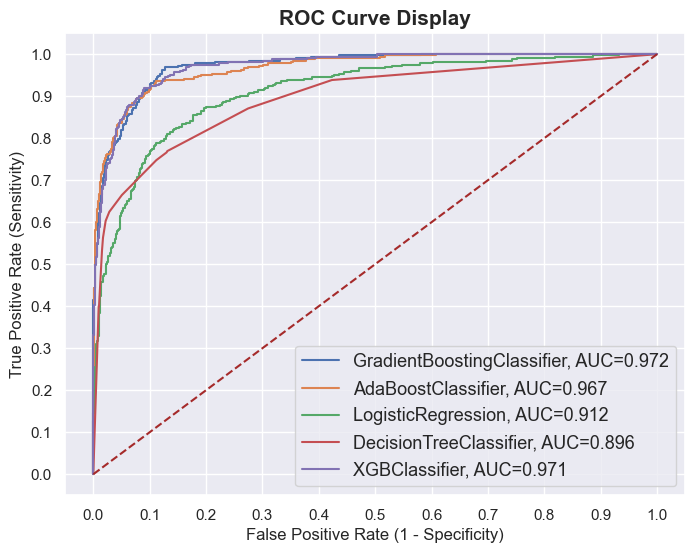

In [104]:
# Split the tuple best_models to a list
_ , models = map(list, zip(*best_models))    

# Define a result DataFrame to store values fpr, tpr from the roc_curve function and auc from the roc_auc_score function
# for each model represented by a roc curve. 
result_df = pd.DataFrame(columns=['models', 'fpr','tpr','auc'])

# Store the results to df by iterating through each model with fit & predict_proba to store values
for model in models:
    pipe = imbPipeline(steps=[ ('preprocess', preprocessing),
                                ('classifier', model) ])
    
    model = pipe.fit(X_train, y_train)
    yprob = model.predict_proba(X_test)[::,1]    
    fpr, tpr, _ = roc_curve(y_test,  yprob)
    auc = roc_auc_score(y_test, yprob)    
    result_df = result_df.append({'models':pipe.named_steps['classifier'].__class__.__name__,
                'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)

# Set the name of the models as index 
result_df.set_index('models', inplace=True)

# Plotting ROC curves
fig = plt.figure(figsize=(8,6))
for i in result_df.index:
    plt.plot(result_df.loc[i]['fpr'], 
             result_df.loc[i]['tpr'],
             label='{}, AUC={:.3f}'.format(i, result_df.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='brown', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve Display', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()


---
##### Observations (Model Selection):
- The final model is XGBoost with an AUC of 0.971, represented by the purple line.
- XgBoost is preferred over Gradient Boosting due to computation speed.
- Xgboost is a gradient boost algorithm on steroids and has some advantages such as parallelization, distributed computing, and internal missing values imputation.
- The diagonal brown dotted line is the Random Guessing line; any model below this line is unusable.
- However, other models are doing quite well such as Gradient Boosting with an Auc of 0.972, and AdaBoost with an Auc of 0.967.
---

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [105]:
name, final_model = tuned_models[4]

In [106]:
final_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [107]:
pipeline = imbPipeline(steps=[ ('preprocess', preprocessing),
                                ('classifier', final_model) ])

In [108]:
model_performance_classification_sklearn(pipeline, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.920,0.880,0.699,0.779


### Feature Importance

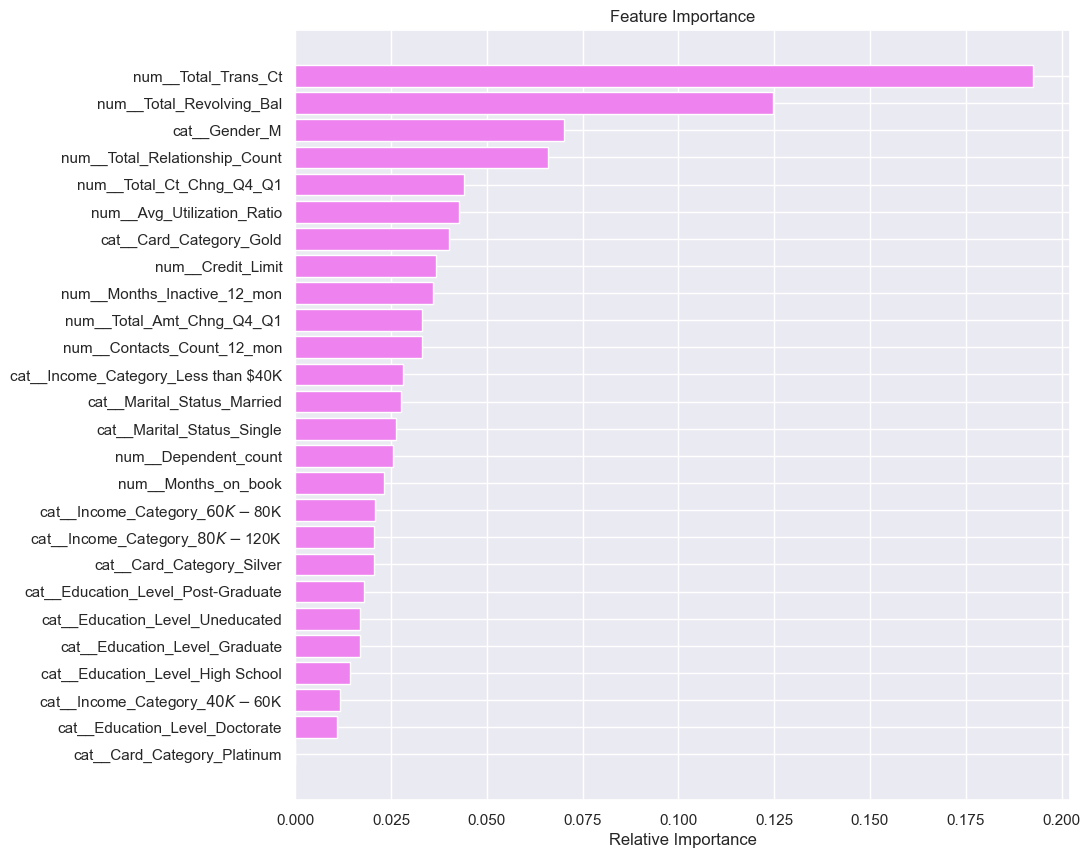

In [111]:
feature_names = final_model.get_booster().feature_names

importances = pipe.steps[1][1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

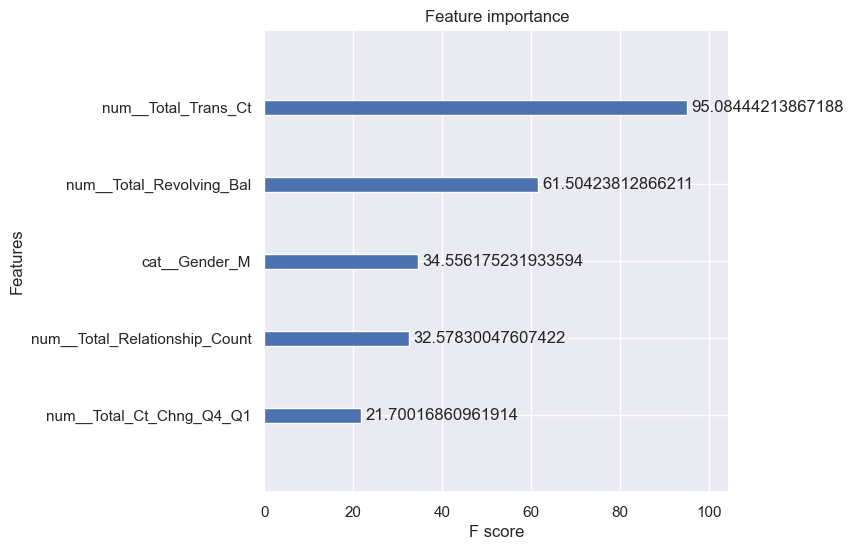

In [112]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_importance(pipe.steps[1][1], importance_type='gain', max_num_features = 5);

---
##### Observations (Feature Importances):
- The top important features: Total_Trans_Ct, Total_Revolving_Bal, Total_Relationship_Count, Total_Trans_Amt, and Total_Ct_Chng_Q4_Q1. 
---

### Test set final performance & Evaluation Measures

#### <font color='blue'> Confusion Matrix</font>

##### Confusion Matrix on training data

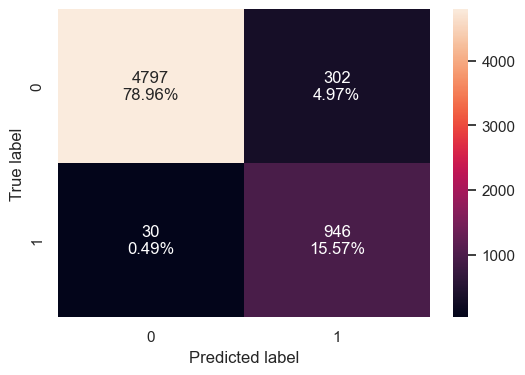

In [113]:
confusion_matrix_sklearn(pipeline, X_train, y_train)

##### Confusion Matrix on validation data

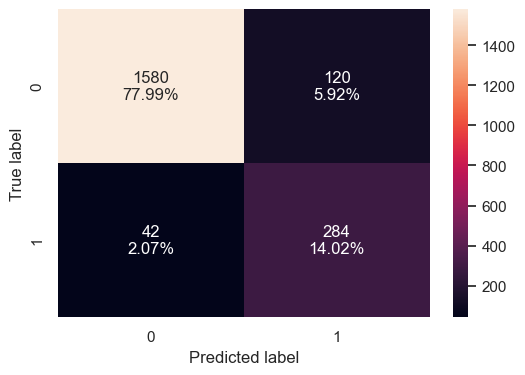

In [114]:
confusion_matrix_sklearn(pipeline, X_val, y_val)

##### Confusion Matrix on test data

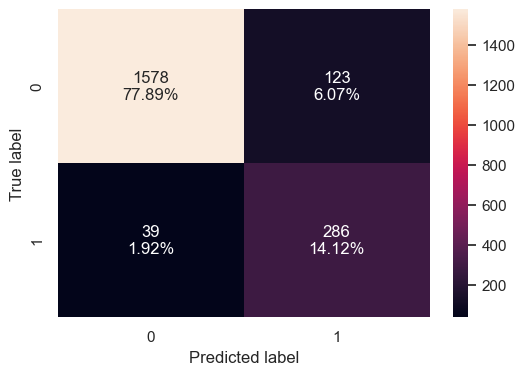

In [115]:
confusion_matrix_sklearn(pipeline, X_test, y_test)

---
##### Observations (Confusion Matrix):
- The FN (False Negative):  for training 0.49% (30 sample), for validation 2.07% (42 samples), for test 1.92% (39 samples)
- The TP (True Positive) & TN (True Negative) ratios are 16% over 79%, 14% over 78%, and 14% over 78% for training, validation, and test data, respectively.  These scores are very similar.
- This model can minimize the FN under 2%. 
---

#### <font color='blue'> K Fold Cross Validation </font>

In [154]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
result = cross_val_score(pipeline, X_train, y_train, scoring='recall', n_jobs=-1, cv = skfold)
print('\033[1m' + 'Recall: %.3f%% Std Dev: %.3f%%' % (result.mean()*100.0, result.std()*100.0) + '\033[0m')

Recall: 85.031% Std Dev: 3.029%


---
##### Observations (Cross Validation):
- StratifiedKFold is used for the XgBoost model instead of KFold.
- This cross validation fits thru the pipeline rf.
- This procedure verifies the performance on test data with a recall score of 85.87% with a standard deviation of 3.69%.
---

#### <font color='blue'> Thresholds</font>

In [117]:
# Find the optimal threshold from the Roc curve
y_probs = pipeline.predict_proba(X_test)[::,1]  # returns the probabilities for positive class 1
fpr, tpr,thresholds = roc_curve(y_test, y_probs)  # roc function from sklearn.metrics returns fpr, tpr, & thresholds in arrays
auc = roc_auc_score(y_test, yprob)  
optimal_thresthold_index = np.argmax(tpr-fpr) # returns the index of the max value
optimal_threshold = thresholds[optimal_thresthold_index] # threshold value at that index
print(f'Optimal Threshold: {optimal_threshold: .3f}')

Optimal Threshold:  0.425


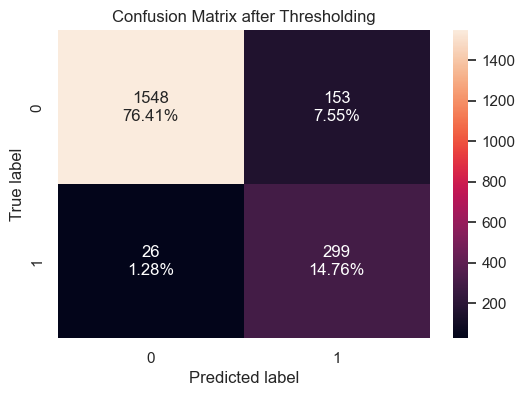

In [118]:
# Apply the optimal threshold to test data
y_pred = (pipeline.predict_proba(X_test)[:,1] >= optimal_threshold) # .astype(bool) 

# plotting confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.asarray([['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
for item in cm.flatten()]).reshape(2, 2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix after Thresholding');

Performance Scores after Thresholding

In [119]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.983     0.910     0.945      1701
           1      0.662     0.920     0.770       325

    accuracy                          0.912      2026
   macro avg      0.822     0.915     0.857      2026
weighted avg      0.932     0.912     0.917      2026



---
##### Observations (Thresholds):
- The optimal threshold (ie. 0.425 rather than the default at 0.5) increase the recall score by 0.04, decrease the accuracy score by 0.008, and decrease the precision score by 0.117
- This tool allows us to customize the performance of the application when the domain experts want to prioritize different outcomes. 
---

#### <font color='blue'> Roc Curve Display </font>

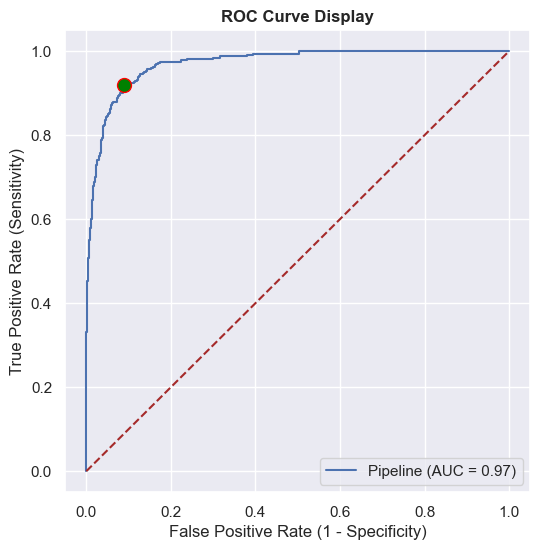

In [120]:
# Plot using RocCurveDisplay

RocCurveDisplay.from_estimator(pipeline, X_test, y_test);
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot([0,1], [0,1], color='brown', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve Display', fontweight='bold', fontsize=12)
plt.plot(fpr[optimal_thresthold_index], tpr[optimal_thresthold_index], \
         marker='o', markersize=10, markeredgecolor='red', markerfacecolor='green')
plt.show();

---
##### Observations (Roc Curve Display):
- The green dot with a red edge represents the optimal threshold at 0.425. 
---

### Summary:
- All required libraries are imported such as pandas, numpy, matplotlib, seaborn, sklearn, xgboost, etc.
- All missing data are identified and treated with SimpleImputer. Outliers are left as is since they're continuous and correct.
- Data preparation is done with feature engineering by one-hot encoding 5 categorical features.
- Define and fit all models with default parameters to the original train dataset. Check Recall scores on the original train and validation set, then select a preferred model. 
- Oversampling train data with SMOTE (Synthetic Minority Over Sampling Technique). Define and fit all models to oversampled data. Check Recall scores on the oversampled train and validation set, then select a preferred model.
- Undersampling train data with RUS (Random undersampler). Define and fit all models to undersampled data. Check Recall scores on the undersampled train and validation set, then select a preferred model.
- Define models with the parameter grids for hyperparameter tuning and fit them in RandomizedSearchCV to find the best parameters.  Then fit all models with the best parameters to the original train, oversampled train, undersampled train, and validation set. Then select 3 preferred models. 
- Compare the performance of all selected models and determine the final model. Verify the result with the Roc Auc Curves plot.
- XGBoost is chosen as the final model with the best Recall score. 
- Evaluate the final model with Confusion Matrix, StratifiedKFold Cross Validation, and determine the optimal threshold as an option.

# Business Insights and Conclusions

---
    Credit card Churn is when a customer cancels a credit card or stops using the credit card service with the Bank.  Our objective is to develop a model that can identify the churners so that the Bank can improve their company-based services and establish customer-based marketing for retention purposes.
    
    In this project, XGBoost is found to be the best model with a Recall score of 0.948 on test data. As shown in Feature Importance, the main factors for churn are the Total Transaction Count, Total Revolving Balance, Total Transaction Amount, Total number of products, and Change in Transaction Count. The marketing team should be considering the customer's profiles with these five categories where the Total Transaction Count is the top priority.  In other words, Our analysis shows that a typical churn client has fewer than 37 transactions, a Total Revolving Balance below $800, a Total Transaction Amount less than $2385, a ratio Change in Transaction Count of less than 62% Q4 over Q1, one or two Total number of products, etc.  These are some indicators that the Bank should target with a marketing campaign in the form of cash back, or bonus rewards to retain these customers.  We also find that people with a Doctorate in education level, with five or six contacts, or with three months inactive are more likely to churn.  Maybe the Bank should do some assessments of their customer service to see if some improvements can be made in the area that is important to these customers such as high-quality calls so that they will be less likely to churn. 
    
    It is obvious that the longer the customers stay with the Bank, the less likely they will churn.  Therefore, our churn prediction model would help the Bank initiate a window of opportunity to launch a retention campaign to keep the good customers and remain profitable.  
---

***

***